<a href="https://colab.research.google.com/github/davidnunez42/medical-school-acceptances/blob/main/AAMC_Medical_School_Acceptances_Research_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas
import pandas as pd

!pip install matplotlib
import matplotlib.pyplot as plt

!pip install numpy
import numpy as np

import warnings
warnings.filterwarnings('ignore')

from scipy.stats import ttest_ind

!pip install scikit-learn
from sklearn import datasets, model_selection, metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import *
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import *
from sklearn.feature_selection import SelectKBest

import statsmodels.stats.multicomp as mc

from google.colab import files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Practicing uploading Excel files**
*(potentially not relevant to my research question)*

In [2]:
file_1 = '/content/drive/My Drive/datasets/2024_FACTS_Table_B-10.xlsx'
df = pd.read_excel(file_1)
df = df.drop([0, 1, 2])
df.head()

,"Table B-10: MCAT® Scores and GPAs for MD-PhD Applicants and\n Matriculants to U.S. MD-Granting Medical Schools, Academic Years 2019-2020 through 2024-2025",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
3,MD-PhD Applicants,NaN,2019-2020,2020-2021,2021-2022,2022-2023,2023-2024,2024-2025
4,MCAT CPBS,Mean,127.7,127.8,127.6,127.8,127.8,127.7
5,NaN,SD,2.8,2.8,2.9,2.9,3,3.1
6,NaN,Minimum,118,118,118,118,118,118
7,NaN,Maximum,132,132,132,132,132,132


In [3]:
file_2 = '/content/drive/My Drive/datasets/2024_FACTS_Table_1.xlsx'
table_df = pd.read_excel(file_2)
table_df = table_df.drop([0, 1, 2, 3, 5, 7, 9])
table_df = table_df.rename(columns={'Table 1: Applicants, Matriculants, Enrollment, and Graduates of U.S. MD-Granting Medical Schools, 2015-2016 through 2024-2025': 'Applicants, Matriculants, Enrollments, and Graduates', 'Unnamed: 3': '2015-2016', 'Unnamed: 4': '2016-2017', 'Unnamed: 5': '2017-2018', 'Unnamed: 6': '2018-2019', 'Unnamed: 7': '2019-2020', 'Unnamed: 8': '2020-2021', 'Unnamed: 9': '2021-2022', 'Unnamed: 10': '2022-2023', 'Unnamed: 11': '2023-2024', 'Unnamed: 12': '2024-2025'})
table_df.head(7)

,"Applicants, Matriculants, Enrollments, and Graduates",Unnamed: 1,Unnamed: 2,2015-2016,2016-2017,2017-2018,2018-2019,2019-2020,2020-2021,2021-2022,2022-2023,2023-2024,2024-2025
4,Applicants,NaN,NaN,52549,53042,51680,52777,53369,53030,62443,55189,52577,51946
6,Matriculants,NaN,NaN,20631,21030,21338,21622,21869,22239,22666,22710,22980,23156
8,Enrollment,NaN,NaN,86583,88176,89727,91217,92620,94068,95340,96385,97797,99562
10,Graduates,NaN,NaN,18943,19262,19562,19935,20390,20926,21057,20927,20869,-


# **MCAT Scores/GPAs for Applicants and Matriculants**
*(separated by sex, years 2018-2019 to 2024-2025)*

In [4]:
file_3 = '/content/drive/My Drive/datasets/2024_FACTS_Table_A-21.xlsx'
applicants_scores_df = pd.read_excel(file_3)

print("MCAT Scores and GPAs for Applicants, separated by sex, 2018-2019 to 2024-2025")
print("\n")
applicants_scores_df = applicants_scores_df.drop([0, 1, 2, 3, 4, 26])
applicants_scores_df = applicants_scores_df.rename(columns={'Table A-21: MCAT Scores and GPAs for Applicants to U.S. MD-Granting Medical Schools by Gender, Academic Years 2018-2019 through 2024-2025': 'Applicants (With Years)',
                                                                'Unnamed: 1': 'Sex', 'Unnamed: 2': 'MCAT CPBS (Mean)', 'Unnamed: 3': 'MCAT CPBS (SD)', 'Unnamed: 4': 'MCAT CARS (Mean)',
                                                                'Unnamed: 5': 'MCAT CARS(SD)', 'Unnamed: 6': 'MCAT BBLS (Mean)', 'Unnamed: 7': 'MCAT BBLS (SD)', 'Unnamed: 8': 'MCAT PSBB (Mean)',
                                                                'Unnamed: 9': 'MCAT PSBB (SD)', 'Unnamed: 10': 'Total MCAT (Mean)', 'Unnamed: 11': 'Total MCAT (SD)', 'Unnamed: 12': 'GPA Science (Mean)',
                                                                'Unnamed: 13': 'GPA Science (SD)', 'Unnamed: 14': 'GPA Non-Science (Mean)', 'Unnamed: 15': 'GPA Non-Science (SD)', 'Unnamed: 16': 'GPA Total (Mean)',
                                                                'Unnamed: 17': 'GPA Total (SD)', 'Unnamed: 18': 'Total # of Applicants'})
applicants_scores_df.loc[6] = applicants_scores_df.loc[6].fillna("2018-2019")
applicants_scores_df.loc[7] = applicants_scores_df.loc[7].fillna("2018-2019")
applicants_scores_df.loc[9] = applicants_scores_df.loc[9].fillna("2019-2020")
applicants_scores_df.loc[10] = applicants_scores_df.loc[10].fillna("2019-2020")
applicants_scores_df.loc[12] = applicants_scores_df.loc[12].fillna("2020-2021")
applicants_scores_df.loc[13] = applicants_scores_df.loc[13].fillna("2020-2021")
applicants_scores_df.loc[15] = applicants_scores_df.loc[15].fillna("2021-2022")
applicants_scores_df.loc[16] = applicants_scores_df.loc[16].fillna("2021-2022")
applicants_scores_df.loc[18] = applicants_scores_df.loc[18].fillna("2022-2023")
applicants_scores_df.loc[19] = applicants_scores_df.loc[19].fillna("2022-2023")
applicants_scores_df.loc[21] = applicants_scores_df.loc[21].fillna("2023-2024")
applicants_scores_df.loc[22] = applicants_scores_df.loc[22].fillna("2023-2024")
applicants_scores_df.loc[24] = applicants_scores_df.loc[24].fillna("2024-2025")
applicants_scores_df.loc[25] = applicants_scores_df.loc[25].fillna("2024-2025")
applicants_scores_df.head(30)

MCAT Scores and GPAs for Applicants, separated by sex, 2018-2019 to 2024-2025




,Applicants (With Years),Sex,MCAT CPBS (Mean),MCAT CPBS (SD),MCAT CARS (Mean),MCAT CARS(SD),MCAT BBLS (Mean),MCAT BBLS (SD),MCAT PSBB (Mean),MCAT PSBB (SD),Total MCAT (Mean),Total MCAT (SD),GPA Science (Mean),GPA Science (SD),GPA Non-Science (Mean),GPA Non-Science (SD),GPA Total (Mean),GPA Total (SD),Total # of Applicants
5,2018-2019,Men,127,2.6,126,2.7,127.1,2.6,127,2.6,507.2,8.8,3.5,0.41,3.68,0.3,3.57,0.34,25875
6,2018-2019,Women,125.7,2.7,125.7,2.8,126.1,2.7,126.7,2.8,504.1,9.5,3.44,0.44,3.74,0.26,3.57,0.34,26882
7,2018-2019,All,126.3,2.7,125.9,2.7,126.6,2.7,126.8,2.7,505.6,9.3,3.47,0.43,3.71,0.28,3.57,0.34,52757
8,2019-2020,Men,127.1,2.6,126.1,2.7,127.2,2.6,127.3,2.6,507.7,8.8,3.51,0.41,3.69,0.3,3.58,0.34,25493
9,2019-2020,Women,125.8,2.8,125.7,2.8,126.2,2.8,126.9,2.8,504.6,9.6,3.45,0.44,3.75,0.26,3.58,0.33,27847
10,2019-2020,All,126.4,2.8,125.9,2.7,126.7,2.7,127.1,2.7,506.1,9.3,3.48,0.43,3.72,0.28,3.58,0.33,53340
11,2020-2021,Men,127.2,2.6,126,2.6,127.3,2.5,127.4,2.6,508,8.7,3.52,0.4,3.71,0.29,3.6,0.33,24620
12,2020-2021,Women,125.9,2.8,125.8,2.7,126.3,2.7,127.1,2.8,505,9.5,3.47,0.43,3.76,0.26,3.6,0.33,28343
13,2020-2021,All,126.5,2.8,125.9,2.7,126.8,2.7,127.2,2.7,506.4,9.2,3.49,0.42,3.74,0.28,3.6,0.33,52963
14,2021-2022,Men,127.1,2.7,125.9,2.7,127.3,2.7,127.5,2.7,507.9,9.1,3.52,0.41,3.71,0.3,3.6,0.34,26948


In [5]:
file_4 = '/content/drive/My Drive/datasets/2024_FACTS_Table_A-22.xlsx'

print("MCAT Scores and GPAs for Matriculants, separated by sex, 2018-2019 to 2024-2025")
print("\n")
matriculants_scores_df = pd.read_excel(file_4)
matriculants_scores_df = matriculants_scores_df.drop([0, 1, 2, 3, 4, 26])
matriculants_scores_df = matriculants_scores_df.rename(columns={'Table A-22: MCAT Scores and GPAs for Matriculants to U.S. MD-Granting Medical Schools by Gender, Academic Years 2018-2019 through 2024-2025': 'Matriculants (With Years)',
                                                                'Unnamed: 1': 'Sex', 'Unnamed: 2': 'MCAT CPBS (Mean)', 'Unnamed: 3': 'MCAT CPBS (SD)', 'Unnamed: 4': 'MCAT CARS (Mean)',
                                                                'Unnamed: 5': 'MCAT CARS(SD)', 'Unnamed: 6': 'MCAT BBLS (Mean)', 'Unnamed: 7': 'MCAT BBLS (SD)', 'Unnamed: 8': 'MCAT PSBB (Mean)',
                                                                'Unnamed: 9': 'MCAT PSBB (SD)', 'Unnamed: 10': 'Total MCAT (Mean)', 'Unnamed: 11': 'Total MCAT (SD)', 'Unnamed: 12': 'GPA Science (Mean)',
                                                                'Unnamed: 13': 'GPA Science (SD)', 'Unnamed: 14': 'GPA Non-Science (Mean)', 'Unnamed: 15': 'GPA Non-Science (SD)', 'Unnamed: 16': 'GPA Total (Mean)',
                                                                'Unnamed: 17': 'GPA Total (SD)', 'Unnamed: 18': 'Total # of Matriculants'})
matriculants_scores_df.loc[6] = matriculants_scores_df.loc[6].fillna("2018-2019")
matriculants_scores_df.loc[7] = matriculants_scores_df.loc[7].fillna("2018-2019")
matriculants_scores_df.loc[9] = matriculants_scores_df.loc[9].fillna("2019-2020")
matriculants_scores_df.loc[10] = matriculants_scores_df.loc[10].fillna("2019-2020")
matriculants_scores_df.loc[12] = matriculants_scores_df.loc[12].fillna("2020-2021")
matriculants_scores_df.loc[13] = matriculants_scores_df.loc[13].fillna("2020-2021")
matriculants_scores_df.loc[15] = matriculants_scores_df.loc[15].fillna("2021-2022")
matriculants_scores_df.loc[16] = matriculants_scores_df.loc[16].fillna("2021-2022")
matriculants_scores_df.loc[18] = matriculants_scores_df.loc[18].fillna("2022-2023")
matriculants_scores_df.loc[19] = matriculants_scores_df.loc[19].fillna("2022-2023")
matriculants_scores_df.loc[21] = matriculants_scores_df.loc[21].fillna("2023-2024")
matriculants_scores_df.loc[22] = matriculants_scores_df.loc[22].fillna("2023-2024")
matriculants_scores_df.loc[24] = matriculants_scores_df.loc[24].fillna("2024-2025")
matriculants_scores_df.loc[25] = matriculants_scores_df.loc[25].fillna("2024-2025")
matriculants_scores_df.head(30)

MCAT Scores and GPAs for Matriculants, separated by sex, 2018-2019 to 2024-2025




,Matriculants (With Years),Sex,MCAT CPBS (Mean),MCAT CPBS (SD),MCAT CARS (Mean),MCAT CARS(SD),MCAT BBLS (Mean),MCAT BBLS (SD),MCAT PSBB (Mean),MCAT PSBB (SD),Total MCAT (Mean),Total MCAT (SD),GPA Science (Mean),GPA Science (SD),GPA Non-Science (Mean),GPA Non-Science (SD),GPA Total (Mean),GPA Total (SD),Total # of Matriculants
5,2018-2019,Men,128.2,2.1,127.1,2.3,128.4,2,128.3,2.1,511.9,6.5,3.66,0.3,3.77,0.24,3.71,0.25,10454
6,2018-2019,Women,127.3,2.1,127.2,2.3,127.7,2.1,128.3,2,510.5,6.5,3.64,0.3,3.83,0.19,3.73,0.23,11160
7,2018-2019,All,127.7,2.1,127.1,2.3,128,2.1,128.3,2.1,511.2,6.5,3.65,0.3,3.8,0.21,3.72,0.24,21614
8,2019-2020,Men,128.3,2.1,127.1,2.3,128.4,2,128.5,2,512.3,6.4,3.67,0.3,3.78,0.24,3.72,0.25,10402
9,2019-2020,Women,127.3,2.1,127.1,2.3,127.8,2,128.6,2,510.8,6.5,3.65,0.31,3.84,0.19,3.73,0.23,11461
10,2019-2020,All,127.8,2.2,127.1,2.3,128.1,2.1,128.5,2,511.5,6.5,3.66,0.3,3.81,0.22,3.73,0.24,21863
11,2020-2021,Men,128.3,2.1,127,2.3,128.4,2,128.6,2,512.3,6.4,3.68,0.31,3.79,0.23,3.72,0.25,10271
12,2020-2021,Women,127.4,2.1,127,2.3,127.8,2,128.6,2,510.9,6.4,3.65,0.31,3.84,0.18,3.74,0.23,11926
13,2020-2021,All,127.8,2.2,127,2.3,128.1,2,128.6,2,511.5,6.5,3.66,0.31,3.82,0.21,3.73,0.24,22197
14,2021-2022,Men,128.3,2.1,126.9,2.4,128.6,2,128.8,2,512.6,6.6,3.68,0.31,3.8,0.23,3.73,0.25,10057


# **Applicants, First-Time Applicants, Acceptees, and Matriculants**
*(separated by sex, adjusted to years 2018-2019 to 2024-2025)*

In [6]:
file_5 = '/content/drive/My Drive/datasets/2024_FACTS_Table_A-7.2.xlsx'

print("Applicants, First-Time Applicants, Acceptees, and Matriculants, separated by sex, adjusted to 2018-2019 to 2024-2025")
print("\n")
total_counts_df = pd.read_excel(file_5)
total_counts_df = total_counts_df.drop([0, 1, 2, 3, 11, 19, 27, 35])

total_counts_df = total_counts_df.rename(columns={'Table A-7.2: Applicants, First-Time Applicants, Acceptees, and Matriculants to U.S. MD-Granting Medical Schools by Gender, Academic Years 2015-2016 through 2024-2025': 'Applicants, First-Time Applicants, Acceptees, and Matriculants',
                                                  'Unnamed: 1': 'Gender', 'Unnamed: 2': 'Number and Percent', 'Unnamed: 3': '2015-2016', 'Unnamed: 4': '2016-2017', 'Unnamed: 5': '2017-2018', 'Unnamed: 6': '2018-2019',
                                                  'Unnamed: 7': '2019-2020', 'Unnamed: 8': '2020-2021', 'Unnamed: 9': '2021-2022', 'Unnamed: 10': '2022-2023',
                                                  'Unnamed: 11': '2023-2024', 'Unnamed: 12': '2024-2025', 'Unnamed: 13': '% Change from 2023-2024 to 2024-2025'})

# Replacing Column 1, NaNs for Applicants
total_counts_df.loc[5, 'Applicants, First-Time Applicants, Acceptees, and Matriculants'] = total_counts_df.loc[5, 'Applicants, First-Time Applicants, Acceptees, and Matriculants'] = "Applicants"
total_counts_df.loc[6, 'Applicants, First-Time Applicants, Acceptees, and Matriculants'] = total_counts_df.loc[6, 'Applicants, First-Time Applicants, Acceptees, and Matriculants'] = "Applicants"
total_counts_df.loc[7, 'Applicants, First-Time Applicants, Acceptees, and Matriculants'] = total_counts_df.loc[7, 'Applicants, First-Time Applicants, Acceptees, and Matriculants'] = "Applicants"
total_counts_df.loc[8, 'Applicants, First-Time Applicants, Acceptees, and Matriculants'] = total_counts_df.loc[8, 'Applicants, First-Time Applicants, Acceptees, and Matriculants'] = "Applicants"
total_counts_df.loc[9, 'Applicants, First-Time Applicants, Acceptees, and Matriculants'] = total_counts_df.loc[9, 'Applicants, First-Time Applicants, Acceptees, and Matriculants'] = "Applicants"
total_counts_df.loc[10, 'Applicants, First-Time Applicants, Acceptees, and Matriculants'] = total_counts_df.loc[10, 'Applicants, First-Time Applicants, Acceptees, and Matriculants'] = "Applicants"

# Replacing Column 1, NaNs for First-Time Applicants
total_counts_df.loc[13, 'Applicants, First-Time Applicants, Acceptees, and Matriculants'] = total_counts_df.loc[13, 'Applicants, First-Time Applicants, Acceptees, and Matriculants'] = "First-Time Applicants"
total_counts_df.loc[14, 'Applicants, First-Time Applicants, Acceptees, and Matriculants'] = total_counts_df.loc[14, 'Applicants, First-Time Applicants, Acceptees, and Matriculants'] = "First-Time Applicants"
total_counts_df.loc[15, 'Applicants, First-Time Applicants, Acceptees, and Matriculants'] = total_counts_df.loc[15, 'Applicants, First-Time Applicants, Acceptees, and Matriculants'] = "First-Time Applicants"
total_counts_df.loc[16, 'Applicants, First-Time Applicants, Acceptees, and Matriculants'] = total_counts_df.loc[16, 'Applicants, First-Time Applicants, Acceptees, and Matriculants'] = "First-Time Applicants"
total_counts_df.loc[17, 'Applicants, First-Time Applicants, Acceptees, and Matriculants'] = total_counts_df.loc[17, 'Applicants, First-Time Applicants, Acceptees, and Matriculants'] = "First-Time Applicants"
total_counts_df.loc[18, 'Applicants, First-Time Applicants, Acceptees, and Matriculants'] = total_counts_df.loc[18, 'Applicants, First-Time Applicants, Acceptees, and Matriculants'] = "First-Time Applicants"

# Replacing Column 1, NaNs for Acceptees
total_counts_df.loc[21, 'Applicants, First-Time Applicants, Acceptees, and Matriculants'] = total_counts_df.loc[21, 'Applicants, First-Time Applicants, Acceptees, and Matriculants'] = "Acceptees"
total_counts_df.loc[22, 'Applicants, First-Time Applicants, Acceptees, and Matriculants'] = total_counts_df.loc[22, 'Applicants, First-Time Applicants, Acceptees, and Matriculants'] = "Acceptees"
total_counts_df.loc[23, 'Applicants, First-Time Applicants, Acceptees, and Matriculants'] = total_counts_df.loc[23, 'Applicants, First-Time Applicants, Acceptees, and Matriculants'] = "Acceptees"
total_counts_df.loc[24, 'Applicants, First-Time Applicants, Acceptees, and Matriculants'] = total_counts_df.loc[24, 'Applicants, First-Time Applicants, Acceptees, and Matriculants'] = "Acceptees"
total_counts_df.loc[25, 'Applicants, First-Time Applicants, Acceptees, and Matriculants'] = total_counts_df.loc[25, 'Applicants, First-Time Applicants, Acceptees, and Matriculants'] = "Acceptees"
total_counts_df.loc[26, 'Applicants, First-Time Applicants, Acceptees, and Matriculants'] = total_counts_df.loc[26, 'Applicants, First-Time Applicants, Acceptees, and Matriculants'] = "Acceptees"

# Replacing Column 1, NaNs for Matriculants
total_counts_df.loc[29, 'Applicants, First-Time Applicants, Acceptees, and Matriculants'] = total_counts_df.loc[29, 'Applicants, First-Time Applicants, Acceptees, and Matriculants'] = "Matriculants"
total_counts_df.loc[30, 'Applicants, First-Time Applicants, Acceptees, and Matriculants'] = total_counts_df.loc[30, 'Applicants, First-Time Applicants, Acceptees, and Matriculants'] = "Matriculants"
total_counts_df.loc[31, 'Applicants, First-Time Applicants, Acceptees, and Matriculants'] = total_counts_df.loc[31, 'Applicants, First-Time Applicants, Acceptees, and Matriculants'] = "Matriculants"
total_counts_df.loc[32, 'Applicants, First-Time Applicants, Acceptees, and Matriculants'] = total_counts_df.loc[32, 'Applicants, First-Time Applicants, Acceptees, and Matriculants'] = "Matriculants"
total_counts_df.loc[33, 'Applicants, First-Time Applicants, Acceptees, and Matriculants'] = total_counts_df.loc[33, 'Applicants, First-Time Applicants, Acceptees, and Matriculants'] = "Matriculants"
total_counts_df.loc[34, 'Applicants, First-Time Applicants, Acceptees, and Matriculants'] = total_counts_df.loc[34, 'Applicants, First-Time Applicants, Acceptees, and Matriculants'] = "Matriculants"

# Replacing Column 2, NaNs for Men
total_counts_df.loc[5] = total_counts_df.loc[5].fillna("Men")
total_counts_df.loc[13] = total_counts_df.loc[13].fillna("Men")
total_counts_df.loc[21] = total_counts_df.loc[21].fillna("Men")
total_counts_df.loc[29] = total_counts_df.loc[29].fillna("Men")

# Replacing Column 2, NaNs for Women
total_counts_df.loc[7] = total_counts_df.loc[7].fillna("Women")
total_counts_df.loc[15] = total_counts_df.loc[15].fillna("Women")
total_counts_df.loc[23] = total_counts_df.loc[23].fillna("Women")
total_counts_df.loc[31] = total_counts_df.loc[31].fillna("Women")

# Replacing Column 2, NaNs for Another Gender Identity
total_counts_df.loc[9] = total_counts_df.loc[9].fillna("Another Gender Identity")
total_counts_df.loc[17] = total_counts_df.loc[17].fillna("Another Gender Identity")
total_counts_df.loc[25] = total_counts_df.loc[25].fillna("Another Gender Identity")
total_counts_df.loc[33] = total_counts_df.loc[33].fillna("Another Gender Identity")

total_counts_df_shortened = total_counts_df.drop(columns="2015-2016")
total_counts_df_shortened = total_counts_df_shortened.drop(columns="2016-2017")
total_counts_df_shortened = total_counts_df_shortened.drop(columns="2017-2018")

total_counts_df_shortened.head(33)

Applicants, First-Time Applicants, Acceptees, and Matriculants, separated by sex, adjusted to 2018-2019 to 2024-2025




,"Applicants, First-Time Applicants, Acceptees, and Matriculants",Gender,Number and Percent,2018-2019,2019-2020,2020-2021,2021-2022,2022-2023,2023-2024,2024-2025,% Change from 2023-2024 to 2024-2025
4,Applicants,Men,Number,25875,25493,24620,26948,23924,22574,22088,-2.2
5,Applicants,Men,Percent,49,47.8,46.4,43.2,43.3,42.9,42.5,-0.4
6,Applicants,Women,Number,26882,27847,28343,35438,31191,29763,29528,-0.8
7,Applicants,Women,Percent,50.9,52.2,53.4,56.8,56.5,56.6,56.8,0.2
8,Applicants,Another Gender Identity,Number,-,-,-,-,-,193,266,37.8
9,Applicants,Another Gender Identity,Percent,-,-,-,-,-,0.4,0.5,0.1
10,Applicants,Total,Number,52777,53369,53030,62443,55189,52577,51946,-1.2
12,First-Time Applicants,Men,Number,18220,17963,17101,19421,16210,15907,16107,1.3
13,First-Time Applicants,Men,Percent,47.3,45.8,44.3,41.5,41.9,42.2,41.7,-0.5
14,First-Time Applicants,Women,Number,20247,21248,21421,27288,22449,21651,22253,2.8


In [7]:
matriculants_total_counts = total_counts_df_shortened.drop([4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 20, 21, 22, 23, 24, 25, 26, 29, 31, 33])
matriculants_total_counts

,"Applicants, First-Time Applicants, Acceptees, and Matriculants",Gender,Number and Percent,2018-2019,2019-2020,2020-2021,2021-2022,2022-2023,2023-2024,2024-2025,% Change from 2023-2024 to 2024-2025
28,Matriculants,Men,Number,10454,10402,10271,10057,10060,10160,10261,1
30,Matriculants,Women,Number,11160,11461,11926,12590,12630,12723,12749,0.2
32,Matriculants,Another Gender Identity,Number,-,-,-,-,-,82,123,50
34,Matriculants,Total,Number,21622,21869,22239,22666,22710,22980,23156,0.8


In [8]:
file_6 = '/content/drive/My Drive/datasets/2024_FACTS_Table_A-7.1.xlsx'

print("Applicants, First-Time Applicants, Acceptees, and Matriculants, separated by sex, adjusted to 2005-2006 to 2014-2015")
print("\n")
total_counts_first_df = pd.read_excel(file_6)
total_counts_first_df = total_counts_first_df.drop([0, 1, 2, 3, 9, 15, 21, 27])
total_counts_first_df = total_counts_first_df.rename(columns={'Table A-7.1: Applicants, First-Time Applicants, Acceptees, and Matriculants to U.S. MD-Granting Medical Schools \nby Gender, Academic Years 2005-2006 through 2014-2015': 'Applicants, First-Time Applicants, Acceptees, and Matriculants',
                                                  'Unnamed: 1': 'Gender', 'Unnamed: 2': 'Number and Percent', 'Unnamed: 3': '2005-2006', 'Unnamed: 4': '2006-2007', 'Unnamed: 5': '2007-2008', 'Unnamed: 6': '2008-2009',
                                                  'Unnamed: 7': '2009-2010', 'Unnamed: 8': '2010-2011', 'Unnamed: 9': '2011-2012', 'Unnamed: 10': '2012-2013',
                                                  'Unnamed: 11': '2013-2014', 'Unnamed: 12': '2014-2015', 'Unnamed: 13': '% Change from 2013-2014 to 2014-2015'})

# Replacing Column 1, NaNs for Applicants
total_counts_first_df.loc[5, 'Applicants, First-Time Applicants, Acceptees, and Matriculants'] = total_counts_first_df.loc[5, 'Applicants, First-Time Applicants, Acceptees, and Matriculants'] = "Applicants"
total_counts_first_df.loc[6, 'Applicants, First-Time Applicants, Acceptees, and Matriculants'] = total_counts_first_df.loc[6, 'Applicants, First-Time Applicants, Acceptees, and Matriculants'] = "Applicants"
total_counts_first_df.loc[7, 'Applicants, First-Time Applicants, Acceptees, and Matriculants'] = total_counts_first_df.loc[7, 'Applicants, First-Time Applicants, Acceptees, and Matriculants'] = "Applicants"
total_counts_first_df.loc[8, 'Applicants, First-Time Applicants, Acceptees, and Matriculants'] = total_counts_first_df.loc[8, 'Applicants, First-Time Applicants, Acceptees, and Matriculants'] = "Applicants"

# Replacing Column 1, NaNs for First-Time Applicants
total_counts_first_df.loc[11, 'Applicants, First-Time Applicants, Acceptees, and Matriculants'] = total_counts_first_df.loc[11, 'Applicants, First-Time Applicants, Acceptees, and Matriculants'] = "First-Time Applicants"
total_counts_first_df.loc[12, 'Applicants, First-Time Applicants, Acceptees, and Matriculants'] = total_counts_first_df.loc[12, 'Applicants, First-Time Applicants, Acceptees, and Matriculants'] = "First-Time Applicants"
total_counts_first_df.loc[13, 'Applicants, First-Time Applicants, Acceptees, and Matriculants'] = total_counts_first_df.loc[13, 'Applicants, First-Time Applicants, Acceptees, and Matriculants'] = "First-Time Applicants"
total_counts_first_df.loc[14, 'Applicants, First-Time Applicants, Acceptees, and Matriculants'] = total_counts_first_df.loc[14, 'Applicants, First-Time Applicants, Acceptees, and Matriculants'] = "First-Time Applicants"

# Replacing Column 1, NaNs for Acceptees
total_counts_first_df.loc[17, 'Applicants, First-Time Applicants, Acceptees, and Matriculants'] = total_counts_first_df.loc[17, 'Applicants, First-Time Applicants, Acceptees, and Matriculants'] = "Acceptees"
total_counts_first_df.loc[18, 'Applicants, First-Time Applicants, Acceptees, and Matriculants'] = total_counts_first_df.loc[18, 'Applicants, First-Time Applicants, Acceptees, and Matriculants'] = "Acceptees"
total_counts_first_df.loc[19, 'Applicants, First-Time Applicants, Acceptees, and Matriculants'] = total_counts_first_df.loc[19, 'Applicants, First-Time Applicants, Acceptees, and Matriculants'] = "Acceptees"
total_counts_first_df.loc[20, 'Applicants, First-Time Applicants, Acceptees, and Matriculants'] = total_counts_first_df.loc[20, 'Applicants, First-Time Applicants, Acceptees, and Matriculants'] = "Acceptees"

# Replacing Column 1, NaNs for Matriculants
total_counts_first_df.loc[23, 'Applicants, First-Time Applicants, Acceptees, and Matriculants'] = total_counts_first_df.loc[23, 'Applicants, First-Time Applicants, Acceptees, and Matriculants'] = "Matriculants"
total_counts_first_df.loc[24, 'Applicants, First-Time Applicants, Acceptees, and Matriculants'] = total_counts_first_df.loc[24, 'Applicants, First-Time Applicants, Acceptees, and Matriculants'] = "Matriculants"
total_counts_first_df.loc[25, 'Applicants, First-Time Applicants, Acceptees, and Matriculants'] = total_counts_first_df.loc[25, 'Applicants, First-Time Applicants, Acceptees, and Matriculants'] = "Matriculants"
total_counts_first_df.loc[26, 'Applicants, First-Time Applicants, Acceptees, and Matriculants'] = total_counts_first_df.loc[26, 'Applicants, First-Time Applicants, Acceptees, and Matriculants'] = "Matriculants"

# Replacing Column 2, NaNs for Men
total_counts_first_df.loc[5] = total_counts_first_df.loc[5].fillna("Men")
total_counts_first_df.loc[11] = total_counts_first_df.loc[11].fillna("Men")
total_counts_first_df.loc[17] = total_counts_first_df.loc[17].fillna("Men")
total_counts_first_df.loc[23] = total_counts_first_df.loc[23].fillna("Men")

# Replacing Column 2, NaNs for Women
total_counts_first_df.loc[7] = total_counts_first_df.loc[7].fillna("Women")
total_counts_first_df.loc[13] = total_counts_first_df.loc[13].fillna("Women")
total_counts_first_df.loc[19] = total_counts_first_df.loc[19].fillna("Women")
total_counts_first_df.loc[25] = total_counts_first_df.loc[25].fillna("Women")

total_counts_first_df.head(33)

Applicants, First-Time Applicants, Acceptees, and Matriculants, separated by sex, adjusted to 2005-2006 to 2014-2015




,"Applicants, First-Time Applicants, Acceptees, and Matriculants",Gender,Number and Percent,2005-2006,2006-2007,2007-2008,2008-2009,2009-2010,2010-2011,2011-2012,2012-2013,2013-2014,2014-2015,% Change from 2013-2014 to 2014-2015
4,Applicants,Men,Number,18747,19815,21580,21870,22013,22533,23135,24338,25760,26455,2.7
5,Applicants,Men,Percent,50.2,50.7,51,51.8,52.1,52.7,52.7,53.8,53.7,53.5,-0.1
6,Applicants,Women,Number,18624,19293,20735,20360,20252,20207,20780,20922,22250,23019,3.5
7,Applicants,Women,Percent,49.8,49.3,49,48.2,47.9,47.3,47.3,46.2,46.3,46.5,0.1
8,Applicants,Total,Number,37371,39108,42315,42231,42268,42741,43919,45266,48014,49480,3.1
10,First-Time Applicants,Men,Number,13898,14624,15925,15662,15815,16352,16671,17776,18643,19031,2.1
11,First-Time Applicants,Men,Percent,49.3,49.6,49.9,50.6,51,51.5,51.2,52.7,52.3,52,-0.4
12,First-Time Applicants,Women,Number,14318,14867,15966,15284,15183,15413,15913,15929,17022,17588,3.3
13,First-Time Applicants,Women,Percent,50.7,50.4,50.1,49.4,49,48.5,48.8,47.3,47.7,48,0.4
14,First-Time Applicants,Total,Number,28216,29491,31891,30947,31001,31766,32587,33711,35668,36625,2.7


In [9]:
matriculants_total_counts_first = total_counts_first_df.drop([4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 16, 17, 18, 19, 20, 23, 25])
matriculants_total_counts_first

,"Applicants, First-Time Applicants, Acceptees, and Matriculants",Gender,Number and Percent,2005-2006,2006-2007,2007-2008,2008-2009,2009-2010,2010-2011,2011-2012,2012-2013,2013-2014,2014-2015,% Change from 2013-2014 to 2014-2015
22,Matriculants,Men,Number,8764,8923,9177,9422,9573,9909,10193,10453,10588,10625,0.3
24,Matriculants,Women,Number,8239,8438,8582,8614,8817,8756,9037,9064,9467,9718,2.7
26,Matriculants,Total,Number,17003,17361,17759,18036,18390,18665,19230,19517,20055,20343,1.4


# **Potential Questions:**
1. How have MCAT scores and GPAs of female applicants and matriculants changed over time compared to male applicants and matriculants?
2. To what extent do gender differences in MCAT scores and GPAs vary between first-time and repeat applicants, and how have these differences changed over time? *(actually not very easily calculated on further analysis of the tables)*
3. To what extent are the changes in the number of matriculants over the years reflected in the changes of MCAT scores and GPAs of matriculants, and how do these vary by gender? *(possibly?)*

# **Research Question:**
1.  **To what extent have the number of matriculants and their MCAT scores/GPAs changed over the past 20 years? How do these changes compare between females and males?**

# **Data Visualizations**

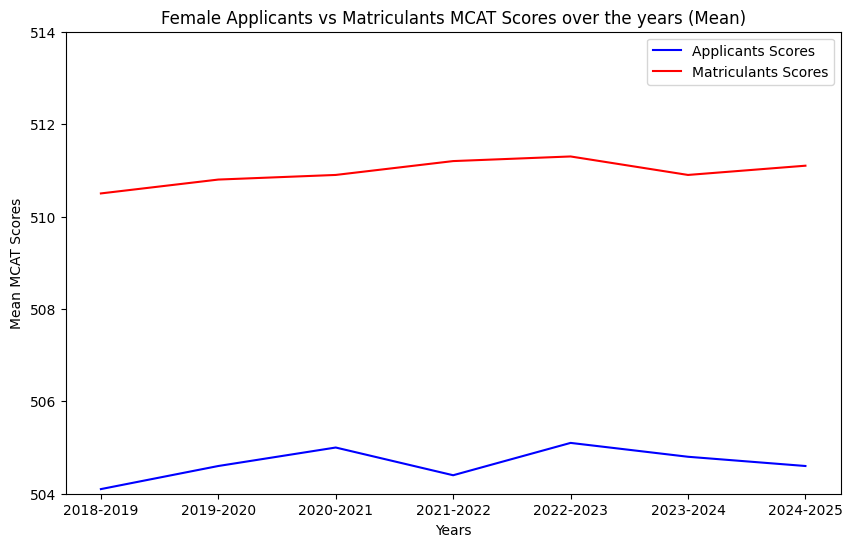

In [10]:
# Scrapped plot (but kept in case of need for future reference)

plt.figure(figsize=(10, 6))

women_applicants_scores = applicants_scores_df[applicants_scores_df['Sex'] == 'Women']
women_matriculants_scores = matriculants_scores_df[matriculants_scores_df['Sex'] == 'Women']
plt.plot(women_applicants_scores['Applicants (With Years)'], women_applicants_scores['Total MCAT (Mean)'], color='blue', label='Applicants Scores')
plt.plot(women_matriculants_scores['Matriculants (With Years)'], women_matriculants_scores['Total MCAT (Mean)'], color='red', label='Matriculants Scores')


plt.title("Female Applicants vs Matriculants MCAT Scores over the years (Mean)")
plt.xlabel('Years')
plt.ylabel('Mean MCAT Scores')
plt.ylim(504, 514)
plt.legend()

plt.show()

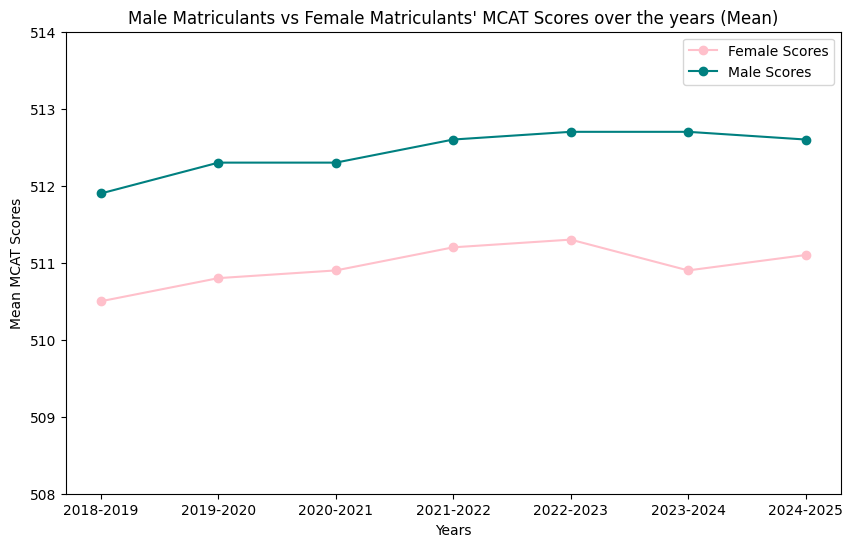

In [285]:
plt.figure(figsize=(10, 6))

women_matriculants_scores = matriculants_scores_df[matriculants_scores_df['Sex'] == 'Women']
plt.plot(women_matriculants_scores['Matriculants (With Years)'], women_matriculants_scores['Total MCAT (Mean)'], marker='o', color='pink', label='Female Scores')

men_matriculants_scores = matriculants_scores_df[matriculants_scores_df['Sex'] == 'Men']
plt.plot(men_matriculants_scores['Matriculants (With Years)'], men_matriculants_scores['Total MCAT (Mean)'], marker='o', color='teal', label='Male Scores')

plt.title("Male Matriculants vs Female Matriculants' MCAT Scores over the years (Mean)")
plt.xlabel('Years')
plt.ylabel('Mean MCAT Scores')
plt.ylim(508, 514)
plt.legend()

plt.show()

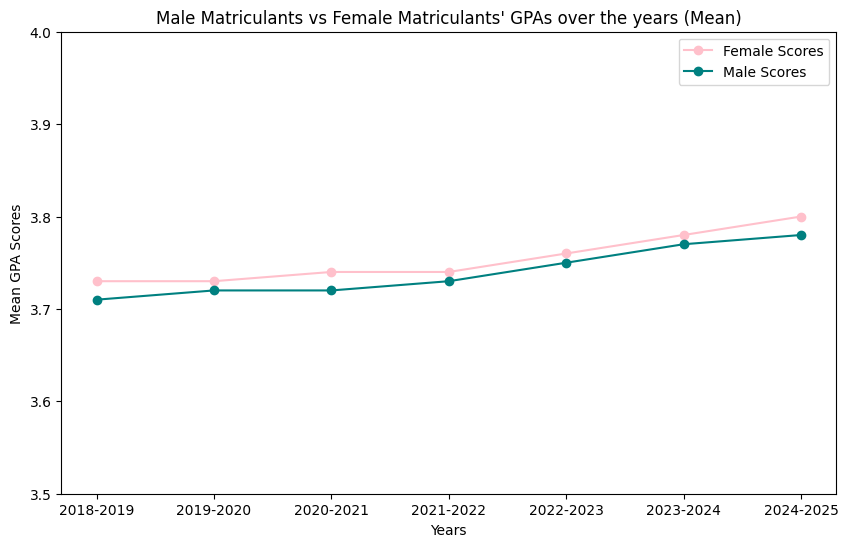

In [286]:
plt.figure(figsize=(10, 6))

women_gpa_scores = matriculants_scores_df[matriculants_scores_df['Sex'] == 'Women']
plt.plot(women_gpa_scores['Matriculants (With Years)'], women_gpa_scores['GPA Total (Mean)'], marker='o', color='pink', label='Female Scores')

men_gpa_scores = matriculants_scores_df[matriculants_scores_df['Sex'] == 'Men']
plt.plot(men_gpa_scores['Matriculants (With Years)'], men_gpa_scores['GPA Total (Mean)'], marker='o', color='teal', label='Male Scores')

plt.title("Male Matriculants vs Female Matriculants' GPAs over the years (Mean)")
plt.xlabel('Years')
plt.ylabel('Mean GPA Scores')
plt.ylim(3.5, 4)
plt.legend()

plt.show()

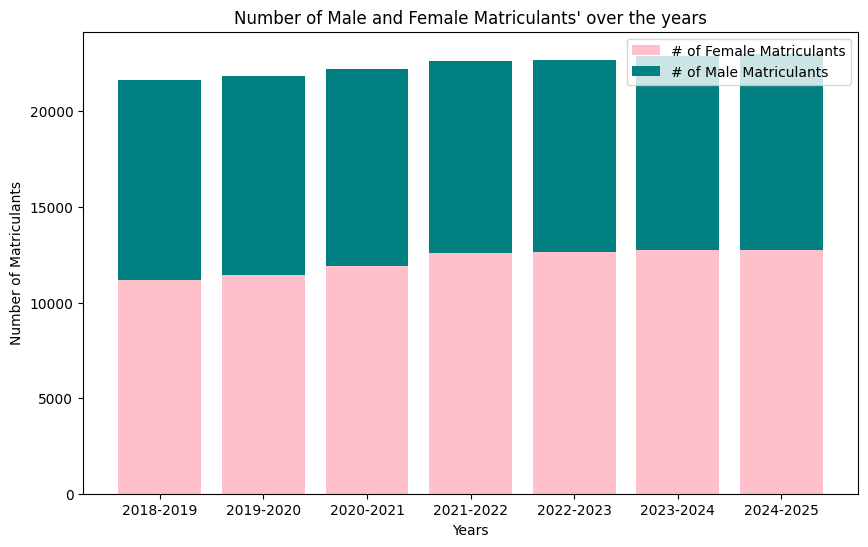

In [287]:
plt.figure(figsize=(10, 6))

women_matriculants = matriculants_total_counts[matriculants_total_counts['Gender'] == 'Women']
x_value = ['2018-2019']
x_value_2 = ['2019-2020']
x_value_3 = ['2020-2021']
x_value_4 = ['2021-2022']
x_value_5 = ['2022-2023']
x_value_6 = ['2023-2024']
x_value_7 = ['2024-2025']
plt.bar(x_value, women_matriculants['2018-2019'], color='pink')
plt.bar(x_value_2, women_matriculants['2019-2020'], color='pink')
plt.bar(x_value_3, women_matriculants['2020-2021'], color='pink')
plt.bar(x_value_4, women_matriculants['2021-2022'], color='pink')
plt.bar(x_value_5, women_matriculants['2022-2023'], color='pink')
plt.bar(x_value_6, women_matriculants['2023-2024'], color='pink')
plt.bar(x_value_7, women_matriculants['2024-2025'], color='pink', label='# of Female Matriculants')

men_matriculants = matriculants_total_counts[matriculants_total_counts['Gender'] == 'Men']
x_value = ['2018-2019']
x_value_2 = ['2019-2020']
x_value_3 = ['2020-2021']
x_value_4 = ['2021-2022']
x_value_5 = ['2022-2023']
x_value_6 = ['2023-2024']
x_value_7 = ['2024-2025']
plt.bar(x_value, men_matriculants['2018-2019'], color='teal', bottom=women_matriculants['2018-2019'])
plt.bar(x_value_2, men_matriculants['2019-2020'], color='teal', bottom=women_matriculants['2019-2020'])
plt.bar(x_value_3, men_matriculants['2020-2021'], color='teal', bottom=women_matriculants['2020-2021'])
plt.bar(x_value_4, men_matriculants['2021-2022'], color='teal', bottom=women_matriculants['2021-2022'])
plt.bar(x_value_5, men_matriculants['2022-2023'], color='teal', bottom=women_matriculants['2022-2023'])
plt.bar(x_value_6, men_matriculants['2023-2024'], color='teal', bottom=women_matriculants['2023-2024'])
plt.bar(x_value_7, men_matriculants['2024-2025'], color='teal', bottom=women_matriculants['2024-2025'], label='# of Male Matriculants')

plt.title("Number of Male and Female Matriculants' over the years")
plt.xlabel('Years')
plt.ylabel('Number of Matriculants')
plt.legend()

plt.show()

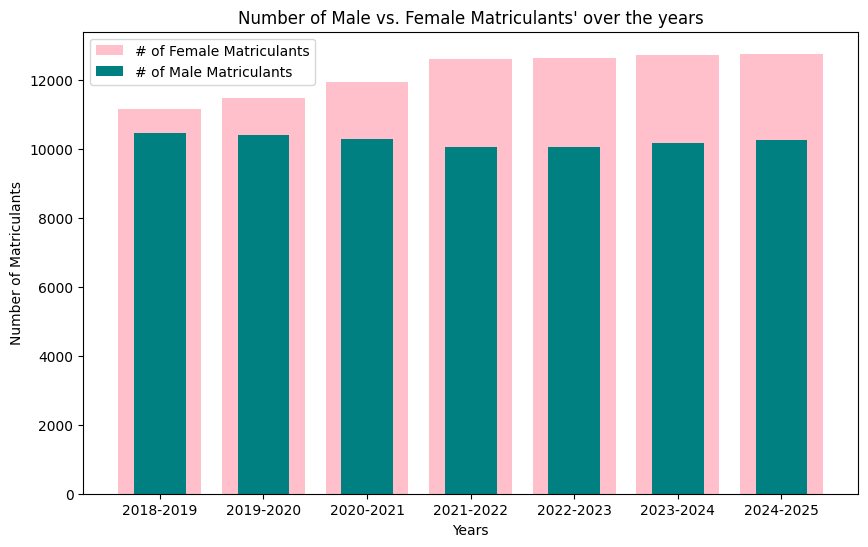

In [14]:
plt.figure(figsize=(10, 6))

women_matriculants = matriculants_total_counts[matriculants_total_counts['Gender'] == 'Women']
x_value = ['2018-2019']
x_value_2 = ['2019-2020']
x_value_3 = ['2020-2021']
x_value_4 = ['2021-2022']
x_value_5 = ['2022-2023']
x_value_6 = ['2023-2024']
x_value_7 = ['2024-2025']
plt.bar(x_value, women_matriculants['2018-2019'], color='pink')
plt.bar(x_value_2, women_matriculants['2019-2020'], color='pink')
plt.bar(x_value_3, women_matriculants['2020-2021'], color='pink')
plt.bar(x_value_4, women_matriculants['2021-2022'], color='pink')
plt.bar(x_value_5, women_matriculants['2022-2023'], color='pink')
plt.bar(x_value_6, women_matriculants['2023-2024'], color='pink')
plt.bar(x_value_7, women_matriculants['2024-2025'], color='pink', label='# of Female Matriculants')

men_matriculants = matriculants_total_counts[matriculants_total_counts['Gender'] == 'Men']
x_value = ['2018-2019']
x_value_2 = ['2019-2020']
x_value_3 = ['2020-2021']
x_value_4 = ['2021-2022']
x_value_5 = ['2022-2023']
x_value_6 = ['2023-2024']
x_value_7 = ['2024-2025']
plt.bar(x_value, men_matriculants['2018-2019'], width=0.5, color='teal')
plt.bar(x_value_2, men_matriculants['2019-2020'], width=0.5, color='teal')
plt.bar(x_value_3, men_matriculants['2020-2021'], width=0.5, color='teal')
plt.bar(x_value_4, men_matriculants['2021-2022'], width=0.5, color='teal')
plt.bar(x_value_5, men_matriculants['2022-2023'], width=0.5, color='teal')
plt.bar(x_value_6, men_matriculants['2023-2024'], width=0.5, color='teal')
plt.bar(x_value_7, men_matriculants['2024-2025'], width=0.5, color='teal', label='# of Male Matriculants')

plt.title("Number of Male vs. Female Matriculants' over the years")
plt.xlabel('Years')
plt.ylabel('Number of Matriculants')
plt.legend()

plt.show()

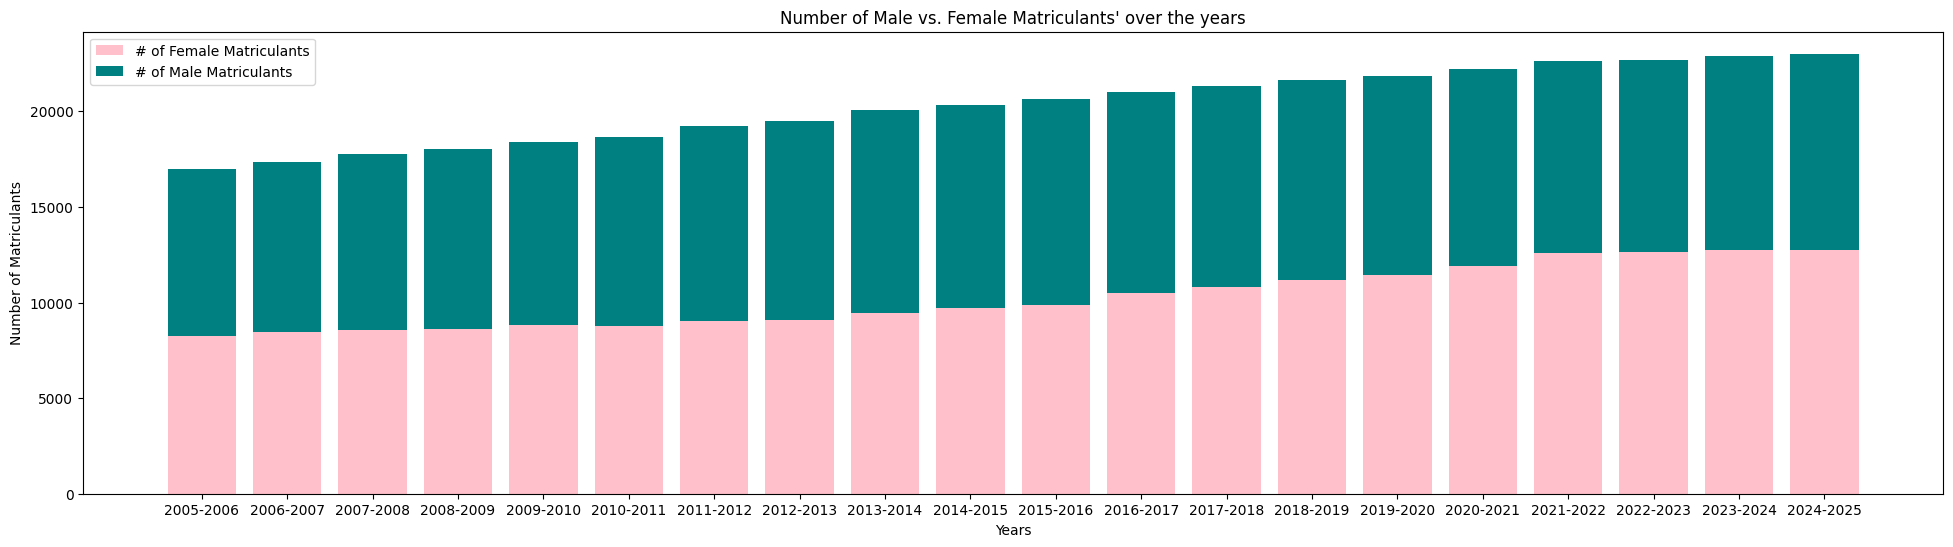

In [15]:
plt.figure(figsize=(24, 6))

matriculants_total_counts_unadjusted = total_counts_df.drop([4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 20, 21, 22, 23, 24, 25, 26, 29, 31, 33])

women_matriculants_unadjusted = matriculants_total_counts_unadjusted[matriculants_total_counts_unadjusted['Gender'] == 'Women']
women_matriculants_first = matriculants_total_counts_first[matriculants_total_counts_first['Gender'] == 'Women']
graph_x_value = ['2005-2006']
graph_x_value_2 = ['2006-2007']
graph_x_value_3 = ['2007-2008']
graph_x_value_4 = ['2008-2009']
graph_x_value_5 = ['2009-2010']
graph_x_value_6 = ['2010-2011']
graph_x_value_7 = ['2011-2012']
graph_x_value_8 = ['2012-2013']
graph_x_value_9 = ['2013-2014']
graph_x_value_10 = ['2014-2015']
graph_x_value_11 = ['2015-2016']
graph_x_value_12 = ['2016-2017']
graph_x_value_13 = ['2017-2018']
graph_x_value_14 = ['2018-2019']
graph_x_value_15 = ['2019-2020']
graph_x_value_16 = ['2020-2021']
graph_x_value_17 = ['2021-2022']
graph_x_value_18 = ['2022-2023']
graph_x_value_19 = ['2023-2024']
graph_x_value_20 = ['2024-2025']

plt.bar(graph_x_value, women_matriculants_first['2005-2006'], color='pink')
plt.bar(graph_x_value_2, women_matriculants_first['2006-2007'], color='pink')
plt.bar(graph_x_value_3, women_matriculants_first['2007-2008'], color='pink')
plt.bar(graph_x_value_4, women_matriculants_first['2008-2009'], color='pink')
plt.bar(graph_x_value_5, women_matriculants_first['2009-2010'], color='pink')
plt.bar(graph_x_value_6, women_matriculants_first['2010-2011'], color='pink')
plt.bar(graph_x_value_7, women_matriculants_first['2011-2012'], color='pink')
plt.bar(graph_x_value_8, women_matriculants_first['2012-2013'], color='pink')
plt.bar(graph_x_value_9, women_matriculants_first['2013-2014'], color='pink')
plt.bar(graph_x_value_10, women_matriculants_first['2014-2015'], color='pink')
plt.bar(graph_x_value_11, women_matriculants_unadjusted['2015-2016'], color='pink')
plt.bar(graph_x_value_12, women_matriculants_unadjusted['2016-2017'], color='pink')
plt.bar(graph_x_value_13, women_matriculants_unadjusted['2017-2018'], color='pink')
plt.bar(graph_x_value_14, women_matriculants_unadjusted['2018-2019'], color='pink')
plt.bar(graph_x_value_15, women_matriculants_unadjusted['2019-2020'], color='pink')
plt.bar(graph_x_value_16, women_matriculants_unadjusted['2020-2021'], color='pink')
plt.bar(graph_x_value_17, women_matriculants_unadjusted['2021-2022'], color='pink')
plt.bar(graph_x_value_18, women_matriculants_unadjusted['2022-2023'], color='pink')
plt.bar(graph_x_value_19, women_matriculants_unadjusted['2023-2024'], color='pink')
plt.bar(graph_x_value_20, women_matriculants_unadjusted['2024-2025'], color='pink', label='# of Female Matriculants')


men_matriculants_unadjusted = matriculants_total_counts_unadjusted[matriculants_total_counts_unadjusted['Gender'] == 'Men']
men_matriculants_first = matriculants_total_counts_first[matriculants_total_counts_first['Gender'] == 'Men']
graph_x_value = ['2005-2006']
graph_x_value_2 = ['2006-2007']
graph_x_value_3 = ['2007-2008']
graph_x_value_4 = ['2008-2009']
graph_x_value_5 = ['2009-2010']
graph_x_value_6 = ['2010-2011']
graph_x_value_7 = ['2011-2012']
graph_x_value_8 = ['2012-2013']
graph_x_value_9 = ['2013-2014']
graph_x_value_10 = ['2014-2015']
graph_x_value_11 = ['2015-2016']
graph_x_value_12 = ['2016-2017']
graph_x_value_13 = ['2017-2018']
graph_x_value_14 = ['2018-2019']
graph_x_value_15 = ['2019-2020']
graph_x_value_16 = ['2020-2021']
graph_x_value_17 = ['2021-2022']
graph_x_value_18 = ['2022-2023']
graph_x_value_19 = ['2023-2024']
graph_x_value_20 = ['2024-2025']

plt.bar(graph_x_value, men_matriculants_first['2005-2006'], bottom=women_matriculants_first['2005-2006'], color='teal')
plt.bar(graph_x_value_2, men_matriculants_first['2006-2007'], bottom=women_matriculants_first['2006-2007'], color='teal')
plt.bar(graph_x_value_3, men_matriculants_first['2007-2008'], bottom=women_matriculants_first['2007-2008'], color='teal')
plt.bar(graph_x_value_4, men_matriculants_first['2008-2009'], bottom=women_matriculants_first['2008-2009'], color='teal')
plt.bar(graph_x_value_5, men_matriculants_first['2009-2010'], bottom=women_matriculants_first['2009-2010'], color='teal')
plt.bar(graph_x_value_6, men_matriculants_first['2010-2011'], bottom=women_matriculants_first['2010-2011'], color='teal')
plt.bar(graph_x_value_7, men_matriculants_first['2011-2012'], bottom=women_matriculants_first['2011-2012'], color='teal')
plt.bar(graph_x_value_8, men_matriculants_first['2012-2013'], bottom=women_matriculants_first['2012-2013'], color='teal')
plt.bar(graph_x_value_9, men_matriculants_first['2013-2014'], bottom=women_matriculants_first['2013-2014'], color='teal')
plt.bar(graph_x_value_10, men_matriculants_first['2014-2015'], bottom=women_matriculants_first['2014-2015'], color='teal')
plt.bar(graph_x_value_11, men_matriculants_unadjusted['2015-2016'], bottom=women_matriculants_unadjusted['2015-2016'], color='teal')
plt.bar(graph_x_value_12, men_matriculants_unadjusted['2016-2017'], bottom=women_matriculants_unadjusted['2016-2017'], color='teal')
plt.bar(graph_x_value_13, men_matriculants_unadjusted['2017-2018'], bottom=women_matriculants_unadjusted['2017-2018'], color='teal')
plt.bar(graph_x_value_14, men_matriculants_unadjusted['2018-2019'], bottom=women_matriculants_unadjusted['2018-2019'], color='teal')
plt.bar(graph_x_value_15, men_matriculants_unadjusted['2019-2020'], bottom=women_matriculants_unadjusted['2019-2020'], color='teal')
plt.bar(graph_x_value_16, men_matriculants_unadjusted['2020-2021'], bottom=women_matriculants_unadjusted['2020-2021'], color='teal')
plt.bar(graph_x_value_17, men_matriculants_unadjusted['2021-2022'], bottom=women_matriculants_unadjusted['2021-2022'], color='teal')
plt.bar(graph_x_value_18, men_matriculants_unadjusted['2022-2023'], bottom=women_matriculants_unadjusted['2022-2023'], color='teal')
plt.bar(graph_x_value_19, men_matriculants_unadjusted['2023-2024'], bottom=women_matriculants_unadjusted['2023-2024'], color='teal')
plt.bar(graph_x_value_20, men_matriculants_unadjusted['2024-2025'], bottom=women_matriculants_unadjusted['2024-2025'], color='teal', label='# of Male Matriculants')

plt.title("Number of Male vs. Female Matriculants' over the years")
plt.xlabel('Years')
plt.ylabel('Number of Matriculants')
plt.legend()

plt.show()

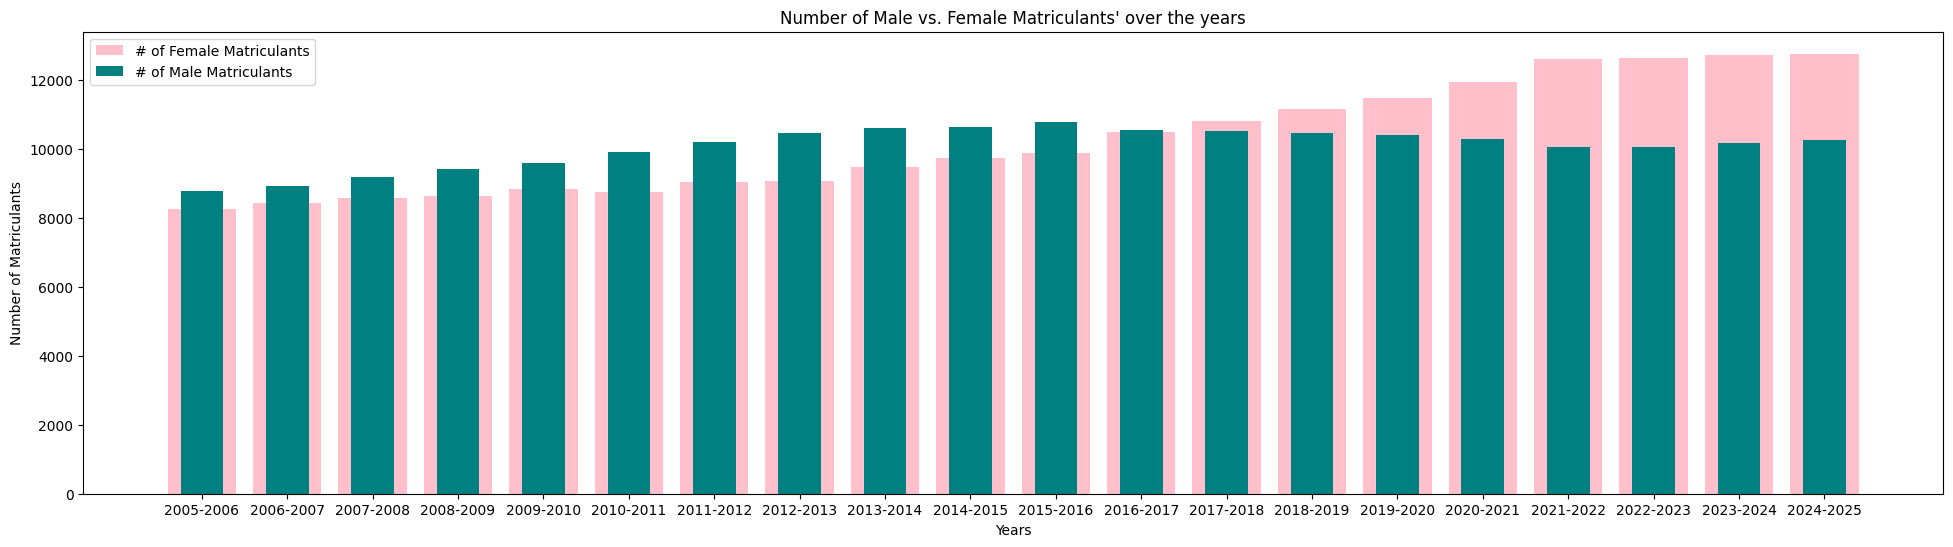

In [16]:
plt.figure(figsize=(24, 6))

matriculants_total_counts_unadjusted = total_counts_df.drop([4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 20, 21, 22, 23, 24, 25, 26, 29, 31, 33])

women_matriculants_unadjusted = matriculants_total_counts_unadjusted[matriculants_total_counts_unadjusted['Gender'] == 'Women']
women_matriculants_first = matriculants_total_counts_first[matriculants_total_counts_first['Gender'] == 'Women']
graph_x_value = ['2005-2006']
graph_x_value_2 = ['2006-2007']
graph_x_value_3 = ['2007-2008']
graph_x_value_4 = ['2008-2009']
graph_x_value_5 = ['2009-2010']
graph_x_value_6 = ['2010-2011']
graph_x_value_7 = ['2011-2012']
graph_x_value_8 = ['2012-2013']
graph_x_value_9 = ['2013-2014']
graph_x_value_10 = ['2014-2015']
graph_x_value_11 = ['2015-2016']
graph_x_value_12 = ['2016-2017']
graph_x_value_13 = ['2017-2018']
graph_x_value_14 = ['2018-2019']
graph_x_value_15 = ['2019-2020']
graph_x_value_16 = ['2020-2021']
graph_x_value_17 = ['2021-2022']
graph_x_value_18 = ['2022-2023']
graph_x_value_19 = ['2023-2024']
graph_x_value_20 = ['2024-2025']

plt.bar(graph_x_value, women_matriculants_first['2005-2006'], color='pink')
plt.bar(graph_x_value_2, women_matriculants_first['2006-2007'], color='pink')
plt.bar(graph_x_value_3, women_matriculants_first['2007-2008'], color='pink')
plt.bar(graph_x_value_4, women_matriculants_first['2008-2009'], color='pink')
plt.bar(graph_x_value_5, women_matriculants_first['2009-2010'], color='pink')
plt.bar(graph_x_value_6, women_matriculants_first['2010-2011'], color='pink')
plt.bar(graph_x_value_7, women_matriculants_first['2011-2012'], color='pink')
plt.bar(graph_x_value_8, women_matriculants_first['2012-2013'], color='pink')
plt.bar(graph_x_value_9, women_matriculants_first['2013-2014'], color='pink')
plt.bar(graph_x_value_10, women_matriculants_first['2014-2015'], color='pink')
plt.bar(graph_x_value_11, women_matriculants_unadjusted['2015-2016'], color='pink')
plt.bar(graph_x_value_12, women_matriculants_unadjusted['2016-2017'], color='pink')
plt.bar(graph_x_value_13, women_matriculants_unadjusted['2017-2018'], color='pink')
plt.bar(graph_x_value_14, women_matriculants_unadjusted['2018-2019'], color='pink')
plt.bar(graph_x_value_15, women_matriculants_unadjusted['2019-2020'], color='pink')
plt.bar(graph_x_value_16, women_matriculants_unadjusted['2020-2021'], color='pink')
plt.bar(graph_x_value_17, women_matriculants_unadjusted['2021-2022'], color='pink')
plt.bar(graph_x_value_18, women_matriculants_unadjusted['2022-2023'], color='pink')
plt.bar(graph_x_value_19, women_matriculants_unadjusted['2023-2024'], color='pink')
plt.bar(graph_x_value_20, women_matriculants_unadjusted['2024-2025'], color='pink', label='# of Female Matriculants')


men_matriculants_unadjusted = matriculants_total_counts_unadjusted[matriculants_total_counts_unadjusted['Gender'] == 'Men']
men_matriculants_first = matriculants_total_counts_first[matriculants_total_counts_first['Gender'] == 'Men']
graph_x_value = ['2005-2006']
graph_x_value_2 = ['2006-2007']
graph_x_value_3 = ['2007-2008']
graph_x_value_4 = ['2008-2009']
graph_x_value_5 = ['2009-2010']
graph_x_value_6 = ['2010-2011']
graph_x_value_7 = ['2011-2012']
graph_x_value_8 = ['2012-2013']
graph_x_value_9 = ['2013-2014']
graph_x_value_10 = ['2014-2015']
graph_x_value_11 = ['2015-2016']
graph_x_value_12 = ['2016-2017']
graph_x_value_13 = ['2017-2018']
graph_x_value_14 = ['2018-2019']
graph_x_value_15 = ['2019-2020']
graph_x_value_16 = ['2020-2021']
graph_x_value_17 = ['2021-2022']
graph_x_value_18 = ['2022-2023']
graph_x_value_19 = ['2023-2024']
graph_x_value_20 = ['2024-2025']

plt.bar(graph_x_value, men_matriculants_first['2005-2006'], width=0.5, color='teal')
plt.bar(graph_x_value_2, men_matriculants_first['2006-2007'], width=0.5, color='teal')
plt.bar(graph_x_value_3, men_matriculants_first['2007-2008'], width=0.5, color='teal')
plt.bar(graph_x_value_4, men_matriculants_first['2008-2009'], width=0.5, color='teal')
plt.bar(graph_x_value_5, men_matriculants_first['2009-2010'], width=0.5, color='teal')
plt.bar(graph_x_value_6, men_matriculants_first['2010-2011'], width=0.5, color='teal')
plt.bar(graph_x_value_7, men_matriculants_first['2011-2012'], width=0.5, color='teal')
plt.bar(graph_x_value_8, men_matriculants_first['2012-2013'], width=0.5, color='teal')
plt.bar(graph_x_value_9, men_matriculants_first['2013-2014'], width=0.5, color='teal')
plt.bar(graph_x_value_10, men_matriculants_first['2014-2015'], width=0.5, color='teal')
plt.bar(graph_x_value_11, men_matriculants_unadjusted['2015-2016'], width=0.5, color='teal')
plt.bar(graph_x_value_12, men_matriculants_unadjusted['2016-2017'], width=0.5, color='teal')
plt.bar(graph_x_value_13, men_matriculants_unadjusted['2017-2018'], width=0.5, color='teal')
plt.bar(graph_x_value_14, men_matriculants_unadjusted['2018-2019'], width=0.5, color='teal')
plt.bar(graph_x_value_15, men_matriculants_unadjusted['2019-2020'], width=0.5, color='teal')
plt.bar(graph_x_value_16, men_matriculants_unadjusted['2020-2021'], width=0.5, color='teal')
plt.bar(graph_x_value_17, men_matriculants_unadjusted['2021-2022'], width=0.5, color='teal')
plt.bar(graph_x_value_18, men_matriculants_unadjusted['2022-2023'], width=0.5, color='teal')
plt.bar(graph_x_value_19, men_matriculants_unadjusted['2023-2024'], width=0.5, color='teal')
plt.bar(graph_x_value_20, men_matriculants_unadjusted['2024-2025'], width=0.5, color='teal', label='# of Male Matriculants')

plt.title("Number of Male vs. Female Matriculants' over the years")
plt.xlabel('Years')
plt.ylabel('Number of Matriculants')
plt.legend()

plt.show()

In [17]:
#total
#total_matriculants_numbers_first = matriculants_total_counts_first.drop([22, 24])
#total_matriculants_numbers_first = total_matriculants_numbers_first.drop(columns={'Applicants, First-Time Applicants, Acceptees, and Matriculants', 'Gender', 'Number and Percent', '% Change from 2013-2014 to 2014-2015'})
#total_matriculants_numbers_first = total_matriculants_numbers_first.melt()
#total_matriculants_numbers_first = total_matriculants_numbers_first.rename(columns={'variable': 'Years', 'value': 'Number'})

total_matriculants_numbers_second = matriculants_total_counts_unadjusted.drop([28, 30, 32])
total_matriculants_numbers_second = total_matriculants_numbers_second.drop(columns={'Applicants, First-Time Applicants, Acceptees, and Matriculants', 'Gender', 'Number and Percent', '% Change from 2023-2024 to 2024-2025'})
total_matriculants_numbers_second = total_matriculants_numbers_second.melt()
total_matriculants_numbers_second = total_matriculants_numbers_second.rename(columns={'variable': 'Years', 'value': 'Number'})

#total_matriculants_numbers = pd.concat([total_matriculants_numbers_first, total_matriculants_numbers_second], ignore_index = True)
#total_matriculants_numbers = total_matriculants_numbers.drop(columns='Years')
#total_matriculants_numbers

#females
women_matriculants_numbers_first = matriculants_total_counts_first.drop([22, 26])
women_matriculants_numbers_first = women_matriculants_numbers_first.drop(columns={'Applicants, First-Time Applicants, Acceptees, and Matriculants', 'Gender', 'Number and Percent', '% Change from 2013-2014 to 2014-2015'})
women_matriculants_numbers_first = women_matriculants_numbers_first.melt()
women_matriculants_numbers_first = women_matriculants_numbers_first.rename(columns={'variable': 'Years', 'value': 'Number'})

women_matriculants_numbers_second = matriculants_total_counts_unadjusted.drop([28, 32, 34])
women_matriculants_numbers_second = women_matriculants_numbers_second.drop(columns={'Applicants, First-Time Applicants, Acceptees, and Matriculants', 'Gender', 'Number and Percent', '% Change from 2023-2024 to 2024-2025'})
women_matriculants_numbers_second = women_matriculants_numbers_second.melt()
women_matriculants_numbers_second = women_matriculants_numbers_second.rename(columns={'variable': 'Years', 'value': 'Number'})

#women_matriculants_numbers = pd.concat([women_matriculants_numbers_first, women_matriculants_numbers_second], ignore_index = True)
#women_matriculants_numbers = women_matriculants_numbers.drop(columns='Years')
#women_matriculants_numbers

#males
men_matriculants_numbers_first = matriculants_total_counts_first.drop([24, 26])
men_matriculants_numbers_first = men_matriculants_numbers_first.drop(columns={'Applicants, First-Time Applicants, Acceptees, and Matriculants', 'Gender', 'Number and Percent', '% Change from 2013-2014 to 2014-2015'})
men_matriculants_numbers_first = men_matriculants_numbers_first.melt()
men_matriculants_numbers_first = men_matriculants_numbers_first.rename(columns={'variable': 'Years', 'value': 'Number'})

men_matriculants_numbers_second = matriculants_total_counts_unadjusted.drop([30, 32, 34])
men_matriculants_numbers_second = men_matriculants_numbers_second.drop(columns={'Applicants, First-Time Applicants, Acceptees, and Matriculants', 'Gender', 'Number and Percent', '% Change from 2023-2024 to 2024-2025'})
men_matriculants_numbers_second = men_matriculants_numbers_second.melt()
men_matriculants_numbers_second = men_matriculants_numbers_second.rename(columns={'variable': 'Years', 'value': 'Number'})

#men_matriculants_numbers = pd.concat([men_matriculants_numbers_first, men_matriculants_numbers_second], ignore_index = True)
#men_matriculants_numbers = men_matriculants_numbers.drop(columns='Years')
#men_matriculants_numbers

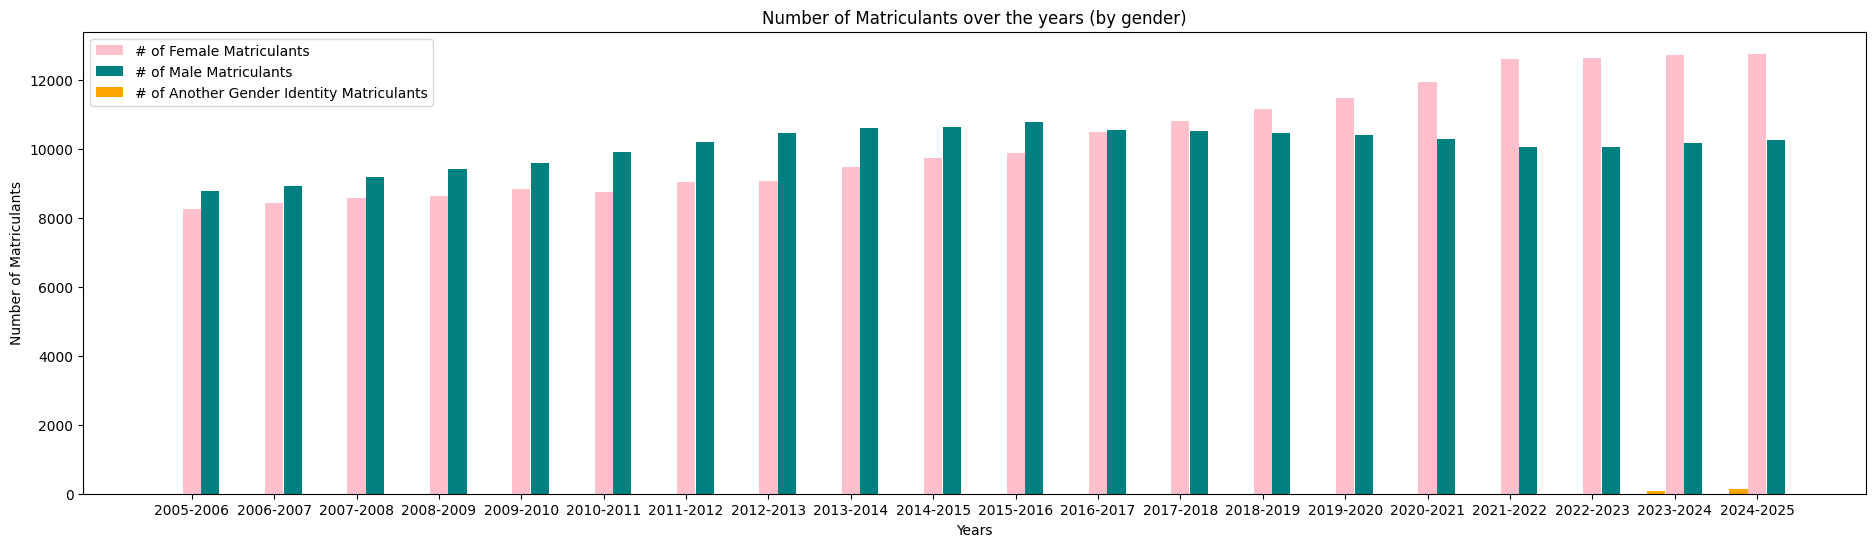

In [288]:
plt.figure(figsize=(23, 6))

years=['2005-2006', '2006-2007', '2007-2008', '2008-2009', '2009-2010', '2010-2011', '2011-2012', '2012-2013', '2013-2014',
       '2014-2015', '2015-2016', '2016-2017', '2017-2018', '2018-2019', '2019-2020', '2020-2021', '2021-2022', '2022-2023',
       '2023-2024', '2024-2025']


width=0.22
x_cat = np.arange(len(years))

women_matriculants_numbers = [8239, 8438, 8582, 8614, 8817, 8756, 9037, 9064, 9467, 9718, 9861, 10474, 10810, 11160, 11461, 11926, 12590, 12630, 12723, 12749]
men_matriculants_numbers = [8764, 8923, 9177, 9422, 9573, 9909, 10193, 10453, 10588, 10625, 10766, 10551, 10516, 10454, 10402, 10271, 10057, 10060, 10160, 10261]
agi_matriculants_numbers = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 82, 123]
total_matriculants_numbers = [17003, 17361, 17759, 18036, 18390, 18665, 19230, 19517, 20055, 20343, 20631, 21030, 21338, 21622, 21869, 22239, 22666, 22710, 22980, 23158]

plt.bar(x_cat, women_matriculants_numbers, width, color='pink', label='# of Female Matriculants')
plt.bar(x_cat+0.225, men_matriculants_numbers, width, color='teal', label='# of Male Matriculants')
plt.bar(x_cat-0.225, agi_matriculants_numbers, width, color='orange', label='# of Another Gender Identity Matriculants')

plt.xticks(x_cat, years)
plt.title("Number of Matriculants over the years (by gender)")
plt.xlabel('Years')
plt.ylabel('Number of Matriculants')
plt.legend()
plt.show()

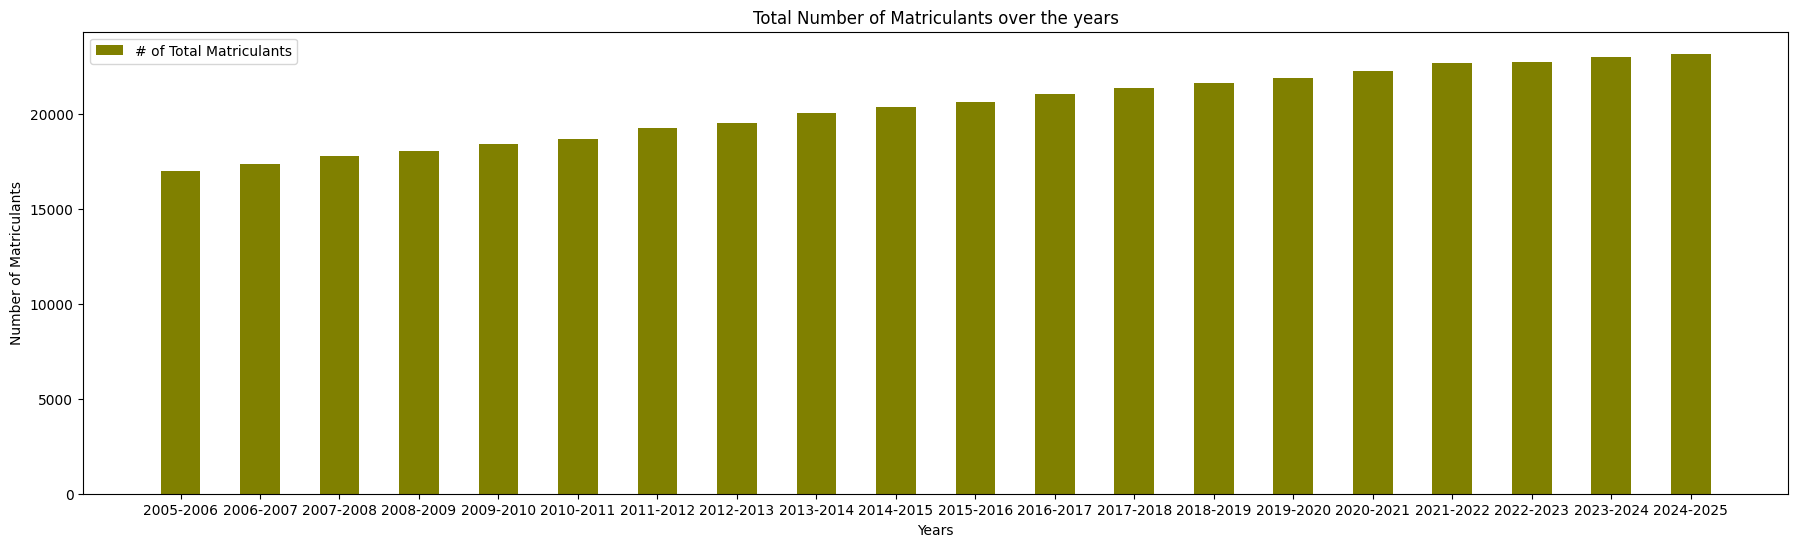

In [144]:
plt.figure(figsize=(22, 6))

years=['2005-2006', '2006-2007', '2007-2008', '2008-2009', '2009-2010', '2010-2011', '2011-2012', '2012-2013', '2013-2014',
       '2014-2015', '2015-2016', '2016-2017', '2017-2018', '2018-2019', '2019-2020', '2020-2021', '2021-2022', '2022-2023',
       '2023-2024', '2024-2025']


width=0.5
x_cat = np.arange(len(years))
total_matriculants_numbers = [17003, 17361, 17759, 18036, 18390, 18665, 19230, 19517, 20055, 20343, 20631, 21030, 21338, 21622, 21869, 22239, 22666, 22710, 22980, 23158]

plt.bar(x_cat, total_matriculants_numbers, width, color='olive', label='# of Total Matriculants')


plt.xticks(x_cat, years)
plt.title("Total Number of Matriculants over the years")
plt.xlabel('Years')
plt.ylabel('Number of Matriculants')
plt.legend()
plt.show()

In [29]:
matriculants_total_counts_unadjusted

,"Applicants, First-Time Applicants, Acceptees, and Matriculants",Gender,Number and Percent,2015-2016,2016-2017,2017-2018,2018-2019,2019-2020,2020-2021,2021-2022,2022-2023,2023-2024,2024-2025,% Change from 2023-2024 to 2024-2025
28,Matriculants,Men,Number,10766,10551,10516,10454,10402,10271,10057,10060,10160,10261,1
30,Matriculants,Women,Number,9861,10474,10810,11160,11461,11926,12590,12630,12723,12749,0.2
32,Matriculants,Another Gender Identity,Number,-,-,-,-,-,-,-,-,82,123,50
34,Matriculants,Total,Number,20631,21030,21338,21622,21869,22239,22666,22710,22980,23156,0.8


# **Statistical Analysis**

**Null:** There are no significant differences in the yearly changes of amount of people, MCAT scores, and GPAs between matriculant females and males.

**Alternative:** There are significant differences in the yearly changes of amount of people, MCAT scores, and GPAs between matriculant females and males.

In [88]:
women_matriculants_adj_1 = women_matriculants_unadjusted.drop(columns="Applicants, First-Time Applicants, Acceptees, and Matriculants")
women_matriculants_adj_2 = women_matriculants_adj_1.drop(columns="Number and Percent")
women_matriculants_adj_3 = women_matriculants_adj_2.drop(columns="Gender")
women_matriculants_dropped_col_adj = women_matriculants_adj_3.drop(columns="% Change from 2023-2024 to 2024-2025")
women_matriculants_dropped_col = women_matriculants_dropped_col_adj.melt()
women_matriculants_dropped_col = women_matriculants_dropped_col.rename(columns={'variable': 'Years', 'value': 'Number of Women Matriculants'})
women_matriculants_dropped_col

,Years,Number of Women Matriculants
0,2015-2016,9861
1,2016-2017,10474
2,2017-2018,10810
3,2018-2019,11160
4,2019-2020,11461
5,2020-2021,11926
6,2021-2022,12590
7,2022-2023,12630
8,2023-2024,12723
9,2024-2025,12749


In [96]:
women_matriculants_mcat_scores = women_matriculants_scores['Total MCAT (Mean)']
women_matriculants_mcat_scores

women_matriculants_gpa = women_matriculants_scores['GPA Total (Mean)']

In [65]:
mcat_data_women_matriculants = [509.7, 507.9, 509.6, 510.5, 510.8, 510.9, 511.2, 511.3, 510.9, 511.1]
women_matriculants_dropped_col['Total MCAT Scores (Mean)'] = mcat_data_women_matriculants

gpa_data_women_matriculants = [3.71, 3.71, 3.71, 3.73, 3.73, 3.74, 3.74, 3.76, 3.78, 3.8]
women_matriculants_dropped_col['GPA Total (Mean)'] = gpa_data_women_matriculants

women_matriculants_dropped_col = women_matriculants_dropped_col.drop(columns="GPA TOtal (Mean)")

women_matriculants_dropped_col

,Years,Number of Women Matriculants,Total MCAT Scores (Mean),GPA Total (Mean)
0,2015-2016,9861,509.7,3.71
1,2016-2017,10474,507.9,3.71
2,2017-2018,10810,509.6,3.71
3,2018-2019,11160,510.5,3.73
4,2019-2020,11461,510.8,3.73
5,2020-2021,11926,510.9,3.74
6,2021-2022,12590,511.2,3.74
7,2022-2023,12630,511.3,3.76
8,2023-2024,12723,510.9,3.78
9,2024-2025,12749,511.1,3.80


In [67]:
past_vals_women_matriculants = pd.DataFrame({
    'Years': ['2005-2006','2006-2007', '2007-2008', '2008-2009', '2009-2010', '2010-2011', '2011-2012', '2012-2013', '2013-2014', '2014-2015'],
    'Number of Women Matriculants': [8239, 8438, 8582, 8614, 8817, 8756, 9037, 9064, 9467, 9718],
    'Total MCAT Scores (Mean)': [507, 507, 508.2, 508.2, 508.2, 508.8, 508.7, 508.8, 509.2, 509.8],
    'GPA Total (Mean)': [3.64, 3.65, 3.66, 3.67, 3.67, 3.69, 3.68, 3.69, 3.69, 3.70]
})
past_vals_women_matriculants

,Years,Number of Women Matriculants,Total MCAT Scores (Mean),GPA Total (Mean)
0,2005-2006,8239,507.0,3.64
1,2006-2007,8438,507.0,3.65
2,2007-2008,8582,508.2,3.66
3,2008-2009,8614,508.2,3.67
4,2009-2010,8817,508.2,3.67
5,2010-2011,8756,508.8,3.69
6,2011-2012,9037,508.7,3.68
7,2012-2013,9064,508.8,3.69
8,2013-2014,9467,509.2,3.69
9,2014-2015,9718,509.8,3.70


In [69]:
women_matriculants_table = pd.concat([past_vals_women_matriculants, women_matriculants_dropped_col], ignore_index=True)
women_matriculants_table

,Years,Number of Women Matriculants,Total MCAT Scores (Mean),GPA Total (Mean)
0,2005-2006,8239,507.0,3.64
1,2006-2007,8438,507.0,3.65
2,2007-2008,8582,508.2,3.66
3,2008-2009,8614,508.2,3.67
4,2009-2010,8817,508.2,3.67
5,2010-2011,8756,508.8,3.69
6,2011-2012,9037,508.7,3.68
7,2012-2013,9064,508.8,3.69
8,2013-2014,9467,509.2,3.69
9,2014-2015,9718,509.8,3.70


**Men Matriculants**

In [89]:
men_matriculants_adj_1 = men_matriculants_unadjusted.drop(columns="Applicants, First-Time Applicants, Acceptees, and Matriculants")
men_matriculants_adj_2 = men_matriculants_adj_1.drop(columns="Number and Percent")
men_matriculants_adj_3 = men_matriculants_adj_2.drop(columns="Gender")
men_matriculants_dropped_col_adj = men_matriculants_adj_3.drop(columns="% Change from 2023-2024 to 2024-2025")
men_matriculants_dropped_col = men_matriculants_dropped_col_adj.melt()
men_matriculants_dropped_col = men_matriculants_dropped_col.rename(columns={'variable': 'Years', 'value': 'Number of Men Matriculants'})
men_matriculants_dropped_col

,Years,Number of Men Matriculants
0,2015-2016,10766
1,2016-2017,10551
2,2017-2018,10516
3,2018-2019,10454
4,2019-2020,10402
5,2020-2021,10271
6,2021-2022,10057
7,2022-2023,10060
8,2023-2024,10160
9,2024-2025,10261


In [97]:
men_matriculants_mcat_scores = men_matriculants_scores['Total MCAT (Mean)']
men_matriculants_mcat_scores

men_matriculants_gpa = men_matriculants_scores['GPA Total (Mean)']

In [99]:
mcat_data_men_matriculants = [512, 509.5, 511.2, 511.9, 512.3, 512.3, 512.6, 512.7, 512.7, 512.6]
men_matriculants_dropped_col['Total MCAT Scores (Mean)'] = mcat_data_men_matriculants

gpa_data_men_matriculants = [3.69, 3.69, 3.7, 3.71, 3.72, 3.72, 3.73, 3.75, 3.77, 3.78]
men_matriculants_dropped_col['GPA Total (Mean)'] = gpa_data_men_matriculants

men_matriculants_dropped_col

,Years,Number of Men Matriculants,Total MCAT Scores (Mean),GPA Total (Mean)
0,2015-2016,10766,512.0,3.69
1,2016-2017,10551,509.5,3.69
2,2017-2018,10516,511.2,3.70
3,2018-2019,10454,511.9,3.71
4,2019-2020,10402,512.3,3.72
5,2020-2021,10271,512.3,3.72
6,2021-2022,10057,512.6,3.73
7,2022-2023,10060,512.7,3.75
8,2023-2024,10160,512.7,3.77
9,2024-2025,10261,512.6,3.78


In [100]:
past_vals_men_matriculants = pd.DataFrame({
    'Years': ['2005-2006','2006-2007', '2007-2008', '2008-2009', '2009-2010', '2010-2011', '2011-2012', '2012-2013', '2013-2014', '2014-2015'],
    'Number of Men Matriculants': [8764, 8923, 9177, 9422, 9573, 9909, 10193, 10453, 10588, 10625],
    'Total MCAT Scores (Mean)': [509.8, 510, 510.8, 511.2, 511.2, 511.4, 511.7, 511.8, 511.8, 512],
    'GPA Total (Mean)': [3.61, 3.62, 3.64, 3.65, 3.65, 3.66, 3.66, 3.67, 3.68, 3.68]
})
past_vals_men_matriculants

,Years,Number of Men Matriculants,Total MCAT Scores (Mean),GPA Total (Mean)
0,2005-2006,8764,509.8,3.61
1,2006-2007,8923,510.0,3.62
2,2007-2008,9177,510.8,3.64
3,2008-2009,9422,511.2,3.65
4,2009-2010,9573,511.2,3.65
5,2010-2011,9909,511.4,3.66
6,2011-2012,10193,511.7,3.66
7,2012-2013,10453,511.8,3.67
8,2013-2014,10588,511.8,3.68
9,2014-2015,10625,512.0,3.68


In [101]:
men_matriculants_table = pd.concat([past_vals_men_matriculants, men_matriculants_dropped_col], ignore_index=True)
men_matriculants_table

,Years,Number of Men Matriculants,Total MCAT Scores (Mean),GPA Total (Mean)
0,2005-2006,8764,509.8,3.61
1,2006-2007,8923,510.0,3.62
2,2007-2008,9177,510.8,3.64
3,2008-2009,9422,511.2,3.65
4,2009-2010,9573,511.2,3.65
5,2010-2011,9909,511.4,3.66
6,2011-2012,10193,511.7,3.66
7,2012-2013,10453,511.8,3.67
8,2013-2014,10588,511.8,3.68
9,2014-2015,10625,512.0,3.68


**Changes over time (Men Matriculants)**

1. *2005-06 to 2006-07:* Matriculants (+159); MCAT (+0.2); GPA (+0.01)
2. *2006-07 to 2007-08:* Matriculants (+254); MCAT (+0.8); GPA (+0.02)
3. *2007-08 to 2008-09:* Matriculants (+245); MCAT (+0.4); GPA (+0.01)
4. *2008-09 to 2009-10:* Matriculants (+151); MCAT (+0); GPA (+0)
5. *2009-10 to 2010-11:* Matriculants (+336); MCAT (+0.2); GPA (+0.01)
6. *2010-11 to 2011-12:* Matriculants (+284); MCAT (+0.3); GPA (+0)
7. *2011-12 to 2012-13:* Matriculants (+260); MCAT (+0.1); GPA (+0.01)
8. *2012-13 to 2013-14:* Matriculants (+135); MCAT (+0); GPA (+0.01)
9. *2013-14 to 2014-15:* Matriculants (+37); MCAT (+0.2); GPA (+0)
10. *2014-15 to 2015-16:* Matriculants (+141); MCAT (+0); GPA (+0.01)
11. *2015-16 to 2016-17:* Matriculants (-215); MCAT (-2.5); GPA (+0)
12. *2016-17 to 2017-18:* Matriculants (-35); MCAT (+1.7); GPA (+0.01)

13. *2017-18 to 2018-19:* Matriculants (-62); MCAT (+0.7); GPA (+0.01)
14. *2018-19 to 2019-20:* Matriculants (-52); MCAT (+0.4); GPA (+0.01)
15. *2019-20 to 2020-21:* Matriculants (-183); MCAT (+0); GPA (+0)
16. *2020-21 to 2021-22:* Matriculants (+214); MCAT (+0.3); GPA (+0.01)
17. *2021-22 to 2022-23:* Matriculants (+3); MCAT (+0.1); GPA (+0.02)
18. *2022-23 to 2023-24:* Matriculants (+100); MCAT (+0); GPA (+0.02)
19. *2023-24 to 2024-25:* Matriculants (+101); MCAT (-0.1); GPA (+0.01)



In [110]:
change_in_men_matriculants_full = [159, 254, 245, 151, 336, 264, 260, 135, 37, 141, -215, -35, -62, -52, -183, 214, 3, 100, 101]
change_in_men_mcat_full = [0.2, 0.8, 0.4, 0, 0.2, 0.3, 0.1, 0, 0.2, 0, -2.5, 1.7, 0.7, 0.4, 0, 0.3, 0.1, 0, -0.1]

corr_val_men = np.corrcoef(change_in_men_matriculants_full, change_in_men_mcat_full)
print(corr_val_men)

[[1.         0.33110302]
 [0.33110302 1.        ]]


In [111]:
change_in_men_gpa_full = [0.01, 0.02, 0.01, 0, 0.01, 0, 0.01, 0.01, 0, 0.01, 0, 0.01, 0.01, 0.01, 0, 0.01, 0.02, 0.02, 0.01]
# last one was 2014-15 minus 2013-14
corr_val_men_gpa_full = np.corrcoef(change_in_men_matriculants_full, change_in_men_gpa_full)
print(corr_val_men_gpa_full)

[[1.         0.27054732]
 [0.27054732 1.        ]]


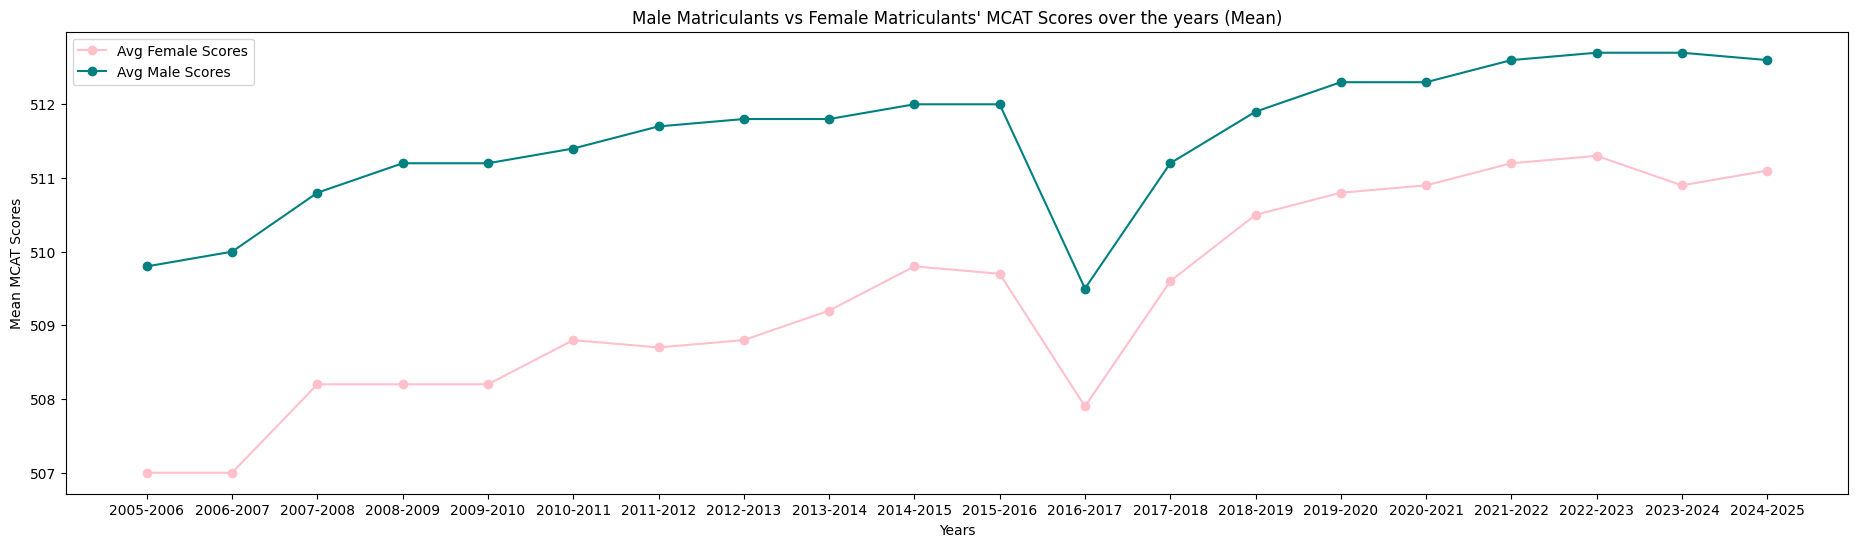

In [109]:
plt.figure(figsize=(23, 6))

plt.plot(women_matriculants_table['Years'], women_matriculants_table['Total MCAT Scores (Mean)'], marker='o', color='pink', label='Avg Female Scores')
plt.plot(men_matriculants_table['Years'], men_matriculants_table['Total MCAT Scores (Mean)'], marker='o', color='teal', label='Avg Male Scores')

plt.title("Male Matriculants vs Female Matriculants' MCAT Scores over the years (Mean)")
plt.xlabel('Years')
plt.ylabel('Mean MCAT Scores')
plt.legend()

plt.show()

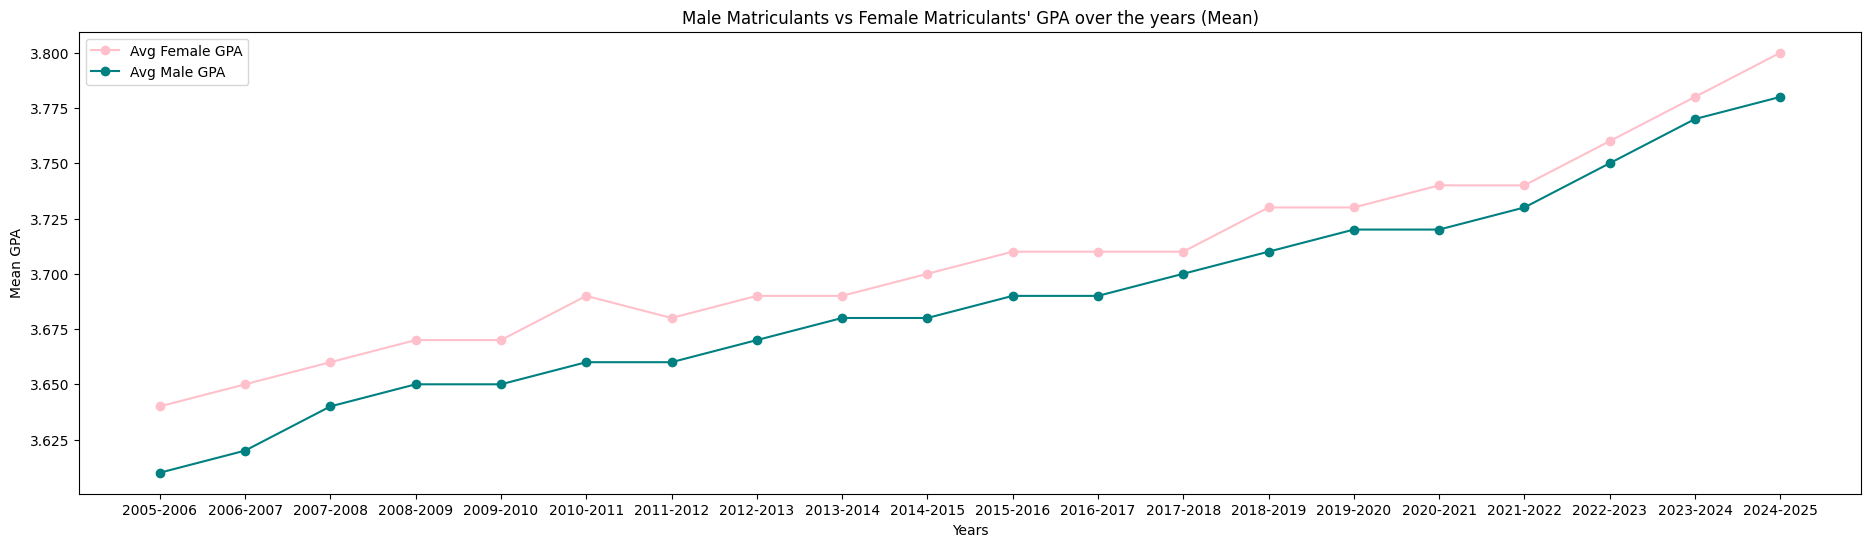

In [105]:
plt.figure(figsize=(23, 6))

plt.plot(women_matriculants_table['Years'], women_matriculants_table['GPA Total (Mean)'], marker='o', color='pink', label='Avg Female GPA')
plt.plot(men_matriculants_table['Years'], men_matriculants_table['GPA Total (Mean)'], marker='o', color='teal', label='Avg Male GPA')

plt.title("Male Matriculants vs Female Matriculants' GPA over the years (Mean)")
plt.xlabel('Years')
plt.ylabel('Mean GPA')
plt.legend()

plt.show()

**Changes over time (Women Matriculants)**

1. *2005-06 to 2006-07:* Matriculants (+199); MCAT (+0); GPA (+0.01)
2. *2006-07 to 2007-08:* Matriculants (+144); MCAT (+1.2); GPA (+0.01)
3. *2007-08 to 2008-09:* Matriculants (+32); MCAT (+0); GPA (+0.01)
4. *2008-09 to 2009-10:* Matriculants (+203); MCAT (+0); GPA (+0)
5. *2009-10 to 2010-11:* Matriculants (-61); MCAT (+0.6); GPA (+0.02)
6. *2010-11 to 2011-12:* Matriculants (+281); MCAT (-0.1); GPA (-0.01)
7. *2011-12 to 2012-13:* Matriculants (+27); MCAT (+0.1); GPA (+0.01)
8. *2012-13 to 2013-14:* Matriculants (+403); MCAT (+0.4); GPA (+0)
9. *2013-14 to 2014-15:* Matriculants (+251); MCAT (+0.6); GPA (+0.01)
10. *2014-15 to 2015-16:* Matriculants (+143); MCAT (-0.1); GPA (+0.01)
11. *2015-16 to 2016-17:* Matriculants (+613); MCAT (-1.8); GPA (+0)
12. *2016-17 to 2017-18:* Matriculants (+336); MCAT (+1.7); GPA (+0)

13. *2017-18 to 2018-19:* Matriculants (+350); MCAT (+0.9); GPA (+0.02)
14. *2018-19 to 2019-20:* Matriculants (+301); MCAT (+0.3); GPA (+0)
15. *2019-20 to 2020-21:* Matriculants (+465); MCAT (+0.1); GPA (+0.01)
16. *2020-21 to 2021-22:* Matriculants (+664); MCAT (+0.3); GPA (+0)
17. *2021-22 to 2022-23:* Matriculants (+40); MCAT (+0.1); GPA (+0.02)
18. *2022-23 to 2023-24:* Matriculants (+93); MCAT (-0.4); GPA (+0.02)
19. *2023-24 to 2024-25:* Matriculants (+26); MCAT (+0.2); GPA (+0.02)



In [2]:
change_in_women_matriculants_full = [199, 144, 32, 203, -61, 281, 27, 403, 251, 143, 613, 336, 350, 301, 465, 664, 40, 93, 26]
change_in_women_mcat_full = [0, 1.2, 0, 0, 0.6, -0.1, 0.1, 0.4, 0.6, -0.1, -1.8, 1.7, 0.9, 0.3, 0.1, 0.3, 0.1, -0.4, 0.2]

corr_val = np.corrcoef(change_in_women_matriculants_full, change_in_women_mcat_full)
print(corr_val)

NameError: name 'np' is not defined

In [77]:
change_in_women_gpa_full = [0.01, 0.01, 0.01, 0, 0.02, -0.01, 0.01, 0, 0.01, 0.01, 0, 0, 0.02, 0, 0.01, 0, 0.02, 0.02, 0.02]
# last one was 2014-15 minus 2013-14
corr_val_gpa_full = np.corrcoef(change_in_women_matriculants_full, change_in_women_gpa_full)
print(corr_val_gpa_full)

[[ 1.         -0.58973567]
 [-0.58973567  1.        ]]


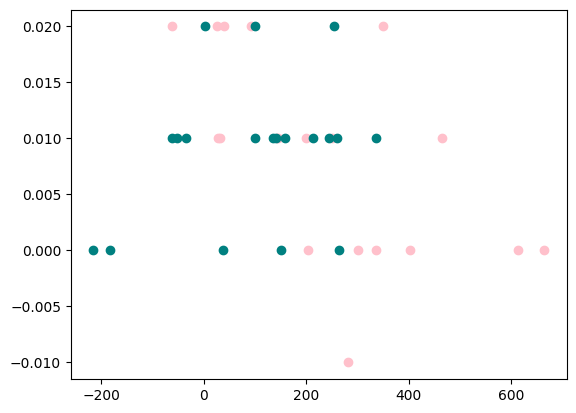

In [114]:
plt.scatter(change_in_women_matriculants_full, change_in_women_gpa_full, color='pink')
plt.scatter(change_in_men_matriculants_full, change_in_men_gpa_full, color='teal')
plt.show()

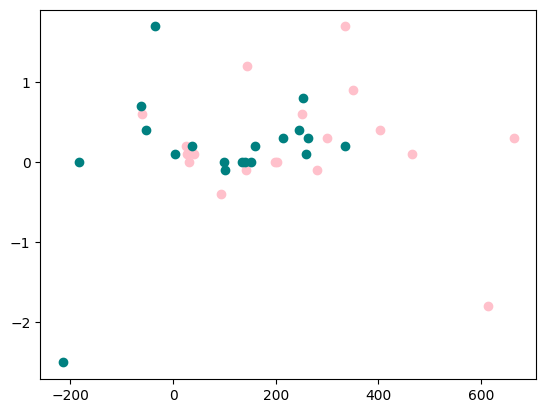

In [116]:
plt.scatter(change_in_women_matriculants_full, change_in_women_mcat_full, color = 'pink')
plt.scatter(change_in_men_matriculants_full, change_in_men_mcat_full, color = 'teal')
plt.show()

In [37]:
test_df = women_matriculants_dropped_col.sample(frac=1).reset_index(drop=True)
test_df

,Years,Number of Women Matriculants,Total MCAT Scores (Mean)
0,2022-2023,12630,511.3
1,2019-2020,11461,510.8
2,2018-2019,11160,510.5
3,2020-2021,11926,510.9
4,2024-2025,12749,511.1
5,2021-2022,12590,511.2
6,2023-2024,12723,510.9


In [38]:
correlation = test_df['Number of Women Matriculants'].corr(test_df['Total MCAT Scores (Mean)'])
print("Correlation: ", correlation)

Correlation:  0.8404479968866588


In [39]:
test_num_women = test_df['Number of Women Matriculants'].to_numpy().astype(float)
test_scores_women = test_df['Total MCAT Scores (Mean)'].to_numpy().astype(float)

test_stacked = np.stack((test_num_women, test_scores_women))
test_corr = np.corrcoef(test_stacked)
print(test_corr)

[[1.       0.840448]
 [0.840448 1.      ]]


In [40]:
correlation = women_matriculants_dropped_col['Number of Women Matriculants'].corr(women_matriculants_dropped_col['Total MCAT Scores (Mean)'])
print("Correlation: ", correlation)

Correlation:  0.8404479968866588


In [149]:
num_women = women_matriculants_table['Number of Women Matriculants'].to_numpy().astype(float)
scores_women = women_matriculants_table['Total MCAT Scores (Mean)'].to_numpy().astype(float)

stacked = np.stack((num_women, scores_women))
corr = np.corrcoef(stacked)
print(corr)


[[1.         0.90247707]
 [0.90247707 1.        ]]


In [1]:
from scipy.stats import ttest_rel

t_stat, p_val = ttest_rel(change_in_women_mcat_full, change_in_men_mcat_full)

print(p_val)
print(t_stat)

NameError: name 'change_in_women_mcat_full' is not defined

p value of 0.34, no statistically significant difference in the change over the years between females and males

In [139]:
from scipy.stats import ttest_rel

t_stat, p_val = ttest_rel(change_in_women_gpa_full, change_in_men_gpa_full)

print(p_val)
print(t_stat)

0.7719902005661943
-0.294174202707276


p value of 0.77, somewhat expected for how little GPA seems to vary over the years (for both groups)

In [158]:
from scipy.stats import ttest_rel

t_stat, p_val = ttest_rel(change_in_women_matriculants_full, change_in_men_matriculants_full)

print(p_val)
print(t_stat)

0.06750533355278361
1.9454799905336082


a p-value of 0.068 here means that the difference between males and females in the changes of matriculants over the years wasn't statistically significant, yet it was close

the year to year differences between groups wasn't significant enough, but there is something there

# **Machine Learning Model**

In [161]:
from sklearn.metrics import *

In [218]:
years_for_model = [2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]

women_matriculants_table['Model Years'] = years_for_model
women_matriculants_table_model_adj = women_matriculants_table.drop(columns="Years")
women_matriculants_table_model_adj

,Number of Women Matriculants,Total MCAT Scores (Mean),GPA Total (Mean),Model Years
0,8239,507.0,3.64,2005
1,8438,507.0,3.65,2006
2,8582,508.2,3.66,2007
3,8614,508.2,3.67,2008
4,8817,508.2,3.67,2009
5,8756,508.8,3.69,2010
6,9037,508.7,3.68,2011
7,9064,508.8,3.69,2012
8,9467,509.2,3.69,2013
9,9718,509.8,3.70,2014


In [219]:
features = women_matriculants_table_model_adj[["Model Years", "Number of Women Matriculants"]]
labels = women_matriculants_table_model_adj["Total MCAT Scores (Mean)"]

In [220]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(features, labels, test_size = 0.2, random_state = 42)

In [221]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [222]:
model.fit(X_train, y_train)

pred = model.predict(X_test)

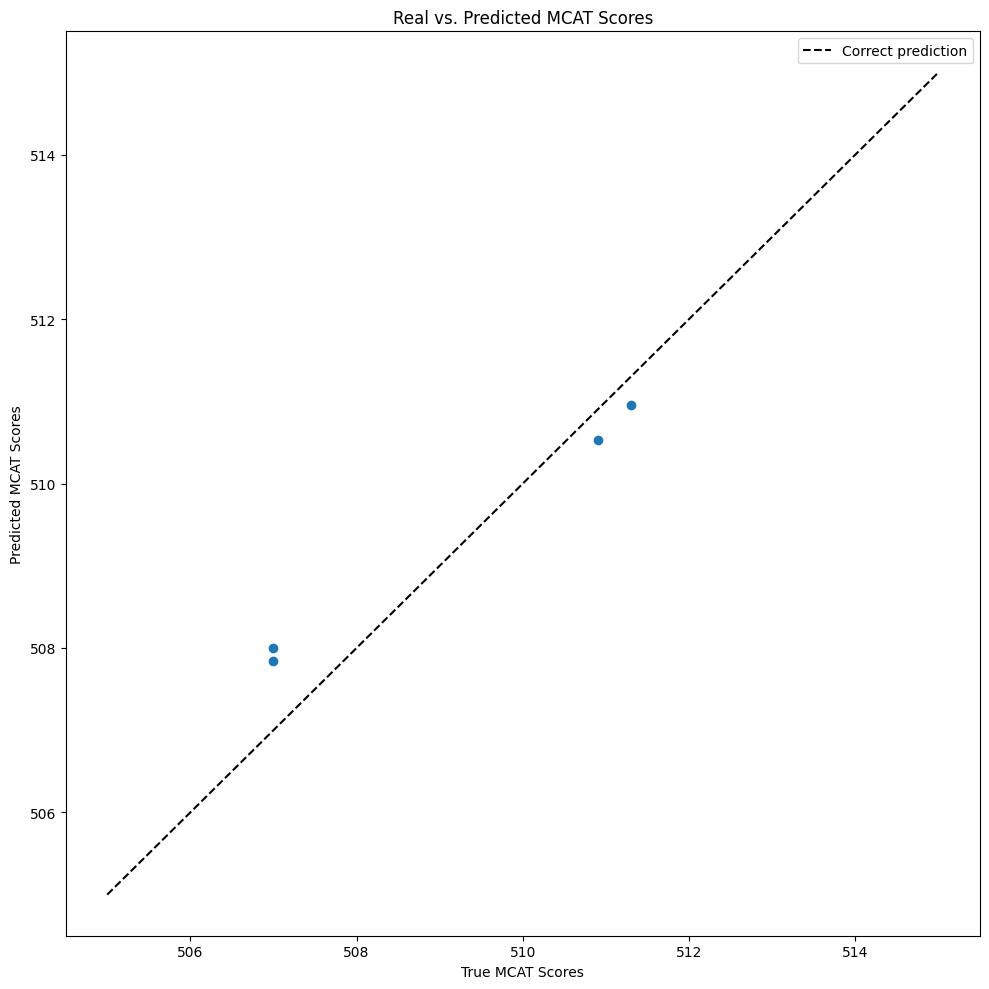

In [224]:
plt.figure(figsize=(10, 10))


plt.scatter(y_test, pred)
plt.plot([505, 515], [505, 515], '--k', label="Correct prediction")


plt.xlabel('True MCAT Scores')
plt.ylabel('Predicted MCAT Scores')
plt.title("Real vs. Predicted MCAT Scores")

plt.axis('tight')
plt.legend()
plt.tight_layout()

In [225]:
print(r2_score(y_test, pred))
print(mean_squared_error(y_test, pred))
print(mean_absolute_error(y_test, pred))

0.8838992668111304
0.49023534589000106
0.6383092240382382


In [228]:
prediction = model.predict(pd.DataFrame([[2025, 9000]],
                         columns=['Model Years', 'Number of Women Matriculants']))

prediction

array([510.1610159])

In [202]:
men_matriculants_table['Model Years'] = years_for_model
men_matriculants_table_model_adj = men_matriculants_table.drop(columns="Years")
men_matriculants_table_model_adj

,Number of Men Matriculants,Total MCAT Scores (Mean),GPA Total (Mean),Model Years
0,8764,509.8,3.61,2005
1,8923,510.0,3.62,2006
2,9177,510.8,3.64,2007
3,9422,511.2,3.65,2008
4,9573,511.2,3.65,2009
5,9909,511.4,3.66,2010
6,10193,511.7,3.66,2011
7,10453,511.8,3.67,2012
8,10588,511.8,3.68,2013
9,10625,512.0,3.68,2014


In [204]:
features_men = men_matriculants_table_model_adj[["Model Years", "Number of Men Matriculants"]]
labels_men = men_matriculants_table_model_adj["Total MCAT Scores (Mean)"]

In [211]:
X_train_men, X_test_men, y_train_men, y_test_men = model_selection.train_test_split(features_men, labels_men, test_size = 0.2, random_state = 42)

In [213]:
model_reg = LinearRegression()

model.fit(X_train_men, y_train_men)

pred_men = model.predict(X_test_men)

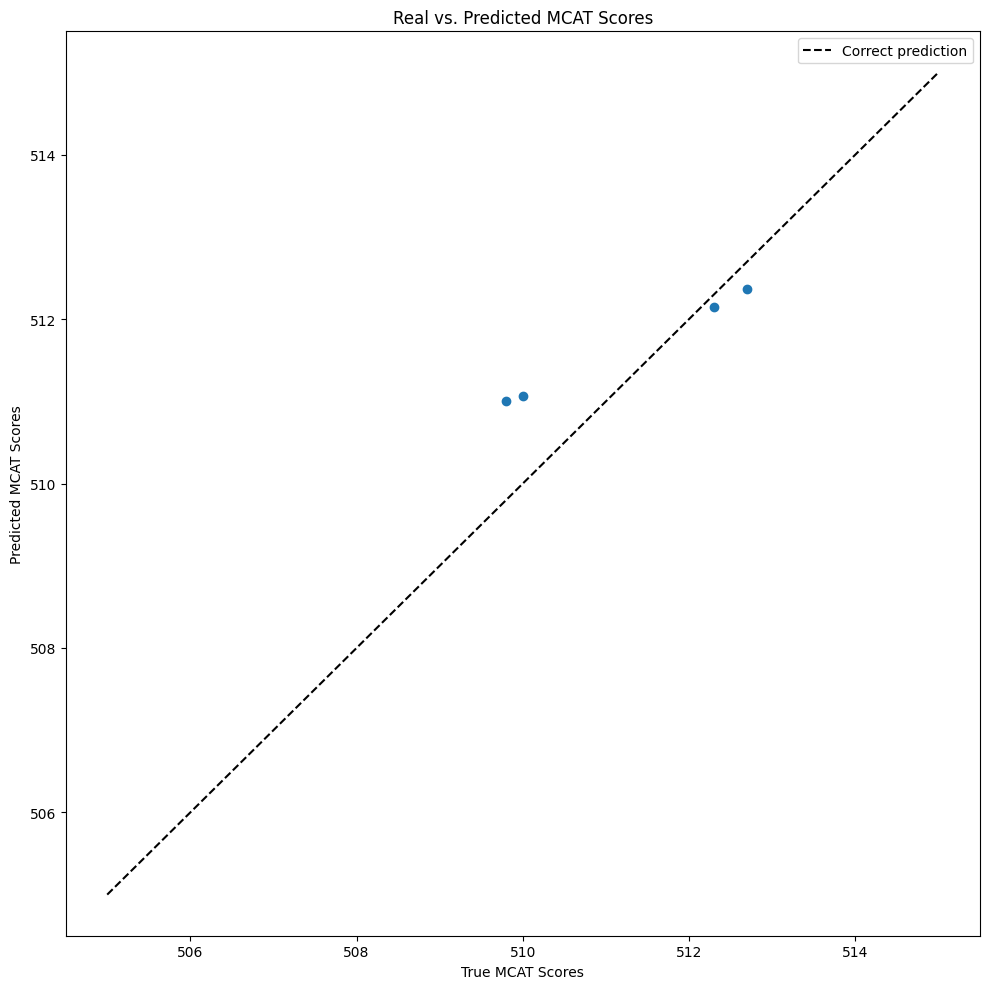

In [214]:
plt.figure(figsize=(10, 10))


plt.scatter(y_test_men, pred_men)
plt.plot([505, 515], [505, 515], '--k', label="Correct prediction")


plt.xlabel('True MCAT Scores')
plt.ylabel('Predicted MCAT Scores')
plt.title("Real vs. Predicted MCAT Scores")

plt.axis('tight')
plt.legend()
plt.tight_layout()

In [215]:
print(r2_score(y_test_men, pred_men))
print(mean_squared_error(y_test_men, pred_men))
print(mean_absolute_error(y_test_men, pred_men))

0.6035673023586996
0.6798820764548308
0.6895411144555368


In [229]:
features_women_adj = women_matriculants_table_model_adj[["Model Years"]]
labels_women_adj = women_matriculants_table_model_adj["Total MCAT Scores (Mean)"]

In [230]:
X_train_adj, X_test_adj, y_train_adj, y_test_adj = model_selection.train_test_split(features_women_adj, labels_women_adj, test_size = 0.2, random_state = 42)

In [232]:
model_adj = LinearRegression()

model_adj.fit(X_train_adj, y_train_adj)

pred_adj = model_adj.predict(X_test_adj)

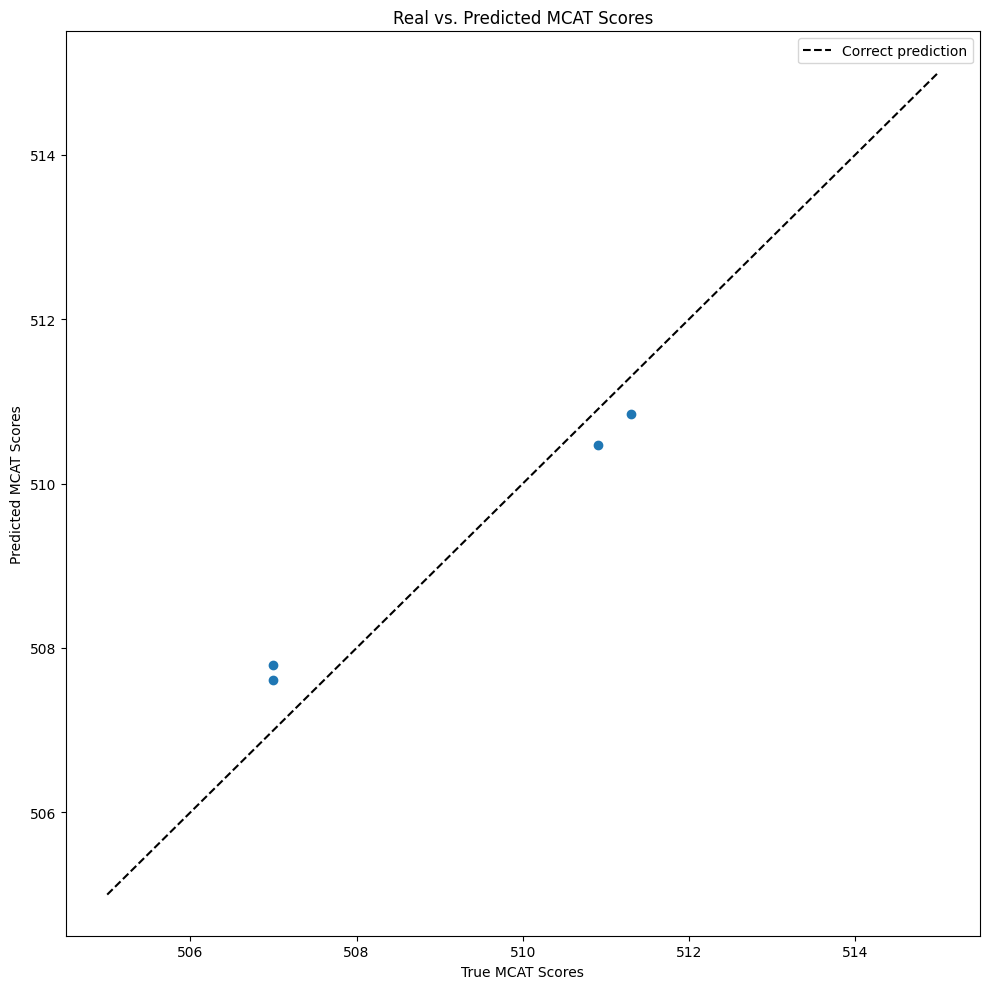

In [233]:
plt.figure(figsize=(10, 10))


plt.scatter(y_test_adj, pred_adj)
plt.plot([505, 515], [505, 515], '--k', label="Correct prediction")


plt.xlabel('True MCAT Scores')
plt.ylabel('Predicted MCAT Scores')
plt.title("Real vs. Predicted MCAT Scores")

plt.axis('tight')
plt.legend()
plt.tight_layout()

In [234]:
print(r2_score(y_test_adj, pred_adj))
print(mean_squared_error(y_test_adj, pred_adj))
print(mean_absolute_error(y_test_adj, pred_adj))

0.9170137518054229
0.350409433001601
0.5740989292715852


In [239]:
prediction = model.predict(pd.DataFrame([[2025, 12821]],
                         columns=['Model Years', 'Number of Women Matriculants']))

prediction

array([511.32734617])

In [259]:
prediction = model_adj.predict(pd.DataFrame([[2025]],
                         columns=['Model Years']))

prediction

array([511.41509576])

In [279]:
features_men_adj = women_matriculants_table_model_adj[["Model Years"]]
labels_men_adj = women_matriculants_table_model_adj["GPA Total (Mean)"]

In [280]:
X_train_men_adj, X_test_men_adj, y_train_men_adj, y_test_men_adj = model_selection.train_test_split(features_men_adj, labels_men_adj, test_size = 0.2, random_state = 42)

In [281]:
model_men_adj = LinearRegression()

model_men_adj.fit(X_train_men_adj, y_train_men_adj)

pred_men_adj = model_men_adj.predict(X_test_men_adj)

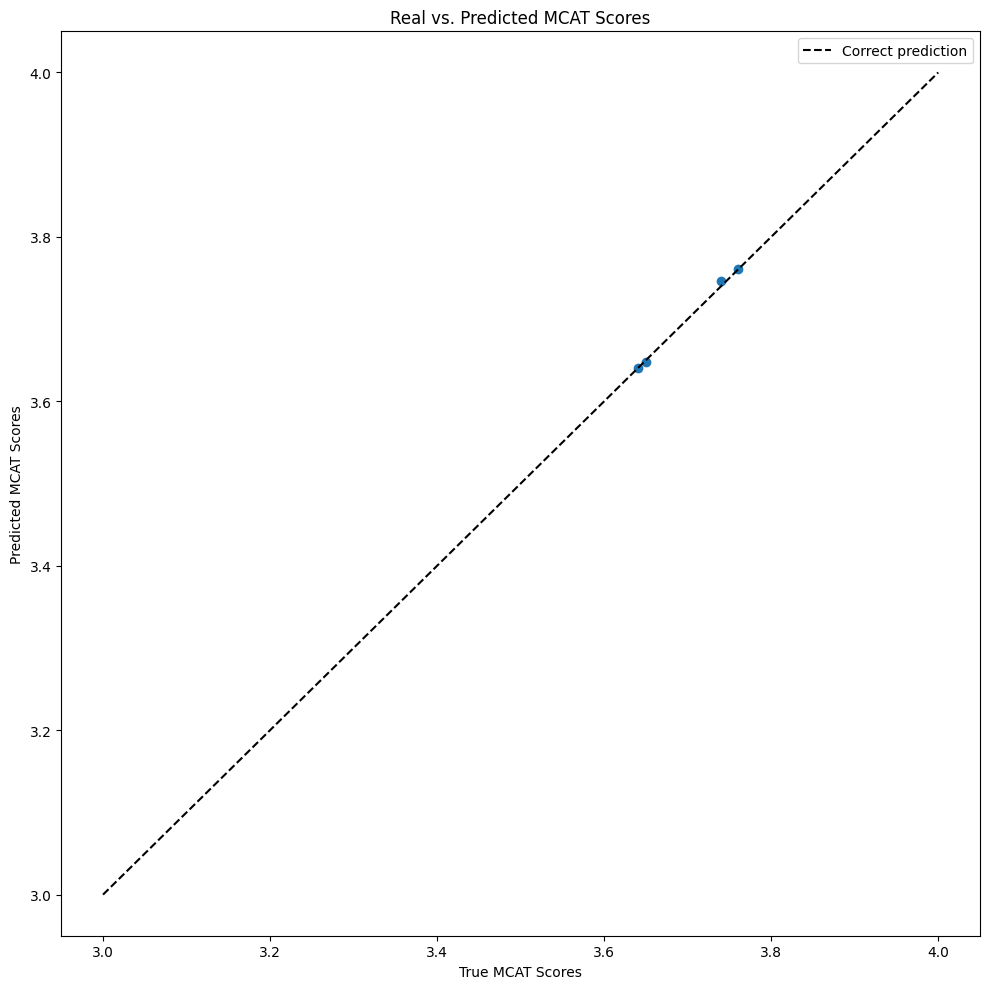

In [282]:
plt.figure(figsize=(10, 10))


plt.scatter(y_test_men_adj, pred_men_adj)
#plt.plot([505, 515], [505, 515], '--k', label="Correct prediction")
plt.plot([3, 4], [3, 4], '--k', label="Correct prediction")

plt.xlabel('True MCAT Scores')
plt.ylabel('Predicted MCAT Scores')
plt.title("Real vs. Predicted MCAT Scores")

plt.axis('tight')
plt.legend()
plt.tight_layout()

In [283]:
print(r2_score(y_test_men_adj, pred_men_adj))
print(mean_squared_error(y_test_men_adj, pred_men_adj))
print(mean_absolute_error(y_test_men_adj, pred_men_adj))

0.9952377680302311
1.3423541364786125e-05
0.0026734278389377586


In [284]:
prediction = model_men_adj.predict(pd.DataFrame([[2025]],
                         columns=['Model Years']))

prediction

array([3.78226964])